# Predicting Startup Success - Machine Learning II Project

By: Katleen McQuiddy, Lindsay Neff, Stephanie Palanca, Prachi Pathak, and Lejla Skahic

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import neighbors
from sklearn.model_selection import KFold, cross_val_score

In [2]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [3]:
import eli5

In [185]:
# allow access to google drive files - if using google drive
from google.colab import drive
drive.mount('/content/drive')

In [186]:
#change directory to project files page - if using google drive
import os
os.chdir('/content/drive/MyDrive/ML2_Project')

[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1155; total time=   1.5s
[CV] END bootstrap=False, max_depth=100, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=733; total time=   3.4s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1366; total time=   8.2s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=944; total time=   1.3s
[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   7.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=944; total time=   1.4s
[CV] END bootstrap=False, max_depth=80, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=

[CV] END bootstrap=False, max_depth=70, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=522; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=733; total time=   1.0s
[CV] END bootstrap=False, max_depth=100, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=733; total time=   3.2s
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=311; total time=   1.5s
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=311; total time=   1.4s
[CV] END bootstrap=True, max_depth=80, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=1577; total time=   6.2s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1366; total time=   1.9s
[CV] END bootstrap=True, max_depth=N

[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1155; total time=   1.5s
[CV] END bootstrap=True, max_depth=90, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1788; total time=   2.3s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1366; total time=   7.7s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1788; total time=   2.5s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1366; total time=   1.9s
[CV] END bootstrap=True, max_depth=70, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=733; total time=   0.9s
[CV] END bootstrap=True, max_depth=70, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=733; total time=   1.0s
[CV] END bootstrap=False, max_depth=

### Economic Data

In [5]:
econ_data = pd.read_csv("UnempCPI2.csv")
econ_data.head()

Year  Month   CPI  Unemployment
0  1948      1  10.2           3.4
1  1948      2   9.5           3.8
2  1948      3   6.8           4.0
3  1948      4   8.3           3.9
4  1948      5   9.4           3.5

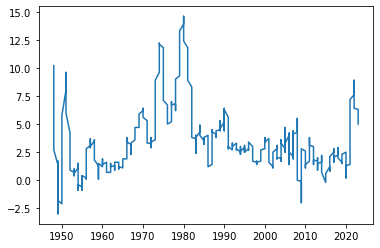

In [6]:
plt.plot(econ_data['Year'],econ_data['CPI'])  # Plot the chart
plt.show()

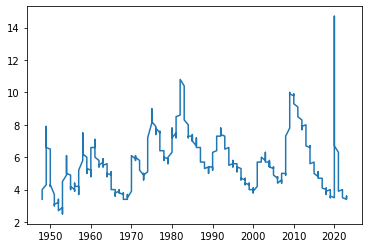

In [7]:
plt.plot(econ_data['Year'],econ_data['Unemployment'])  # Plot the chart
plt.show() 

In [8]:
econ_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          903 non-null    int64  
 1   Month         903 non-null    int64  
 2   CPI           903 non-null    float64
 3   Unemployment  903 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.3 KB


## Startup Data

### Data Cleansing - Startup Data

In [9]:
df_startup = pd.read_csv("startup_data_final1.csv")
df_startup.head()

Organization Name                                         Industries  \
0           Kluster  Analytics, Artificial Intelligence, Machine Le...   
1      Credit Karma  Credit, Finance, Financial Services, FinTech, ...   
2            ecoATM  Consumer Electronics, Recycling, Waste Management   
3            Reddit        Content, News, Social Media, Social Network   
4            Canopy  Artificial Intelligence, Information Services,...   

                      Headquarters Location Founded Date Operating Status  \
0           London, England, United Kingdom       8/1/16           Active   
1  San Francisco, California, United States       1/1/07           Active   
2      San Diego, California, United States       8/2/08           Active   
3  San Francisco, California, United States       1/1/05           Active   
4          Detroit, Michigan, United States       1/1/22           Active   

  Closed Date Number of Articles Investor Type Investment Stage  \
0         NaN                  3           NaN              NaN   
1         NaN                661           NaN              NaN   
2         NaN                121           NaN              NaN   
3         NaN              6,834           NaN              NaN   
4         NaN                 81           NaN              NaN   

   Number of Portfolio Organizations  ...  Number of Contacts  \
0                                NaN  ...                 NaN   
1                                1.0  ...               1,037   
2                                NaN  ...                 150   
3                                1.0  ...                 189   
4                                NaN  ...                  25   

   SEMrush - Monthly Visits  SEMrush - Average Visits (6 months)  \
0                     3,629                                4,494   
1                80,947,049                        72,541,070.83   
2                 1,071,721                         1,602,595.17   
3             5,409,446,308                     4,959,692,115.83   
4                    70,818                            87,030.33   

   Active Tech Count Number of Apps  Total Products Active Patents Granted  \
0                6.0            7.0                   29.0             NaN   
1               70.0            2.0                   52.0             0.0   
2               41.0            2.0                   36.0            63.0   
3                7.0            6.0                   63.0             0.0   
4               54.0            NaN                    NaN             0.0   

   Trademarks Registered  IT Spend Currency (in USD) Estimated Revenue Range  
0                    NaN                         NaN           Less than $1M  
1                    7.0                     64099.0          $100M to $500M  
2                    5.0                   8365866.0           $50M to $100M  
3                   78.0                  12965015.0          $100M to $500M  
4                    3.0                         NaN                     NaN  

[5 rows x 49 columns]

In [10]:
df_startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 49 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Organization Name                              1111 non-null   object 
 1   Industries                                     1110 non-null   object 
 2   Headquarters Location                          1110 non-null   object 
 3   Founded Date                                   1108 non-null   object 
 4   Operating Status                               1111 non-null   object 
 5   Closed Date                                    237 non-null    object 
 6   Number of Articles                             930 non-null    object 
 7   Investor Type                                  1 non-null      object 
 8   Investment Stage                               1 non-null      object 
 9   Number of Portfolio Organizations              23 no

In [11]:
df_startup = df_startup.drop(columns=['Investor Type', 'Investment Stage', 'Number of Portfolio Organizations', 'Number of Investments', 'Number of Exits', 'Number of Exits (IPO)', 'Number of Acquisitions', 'Acquisition Type', 'IPO Date', 'Money Raised at IPO Currency (in USD)', 'Number of Events', 'Number of Contacts', 'SEMrush - Monthly Visits', ' IT Spend Currency (in USD)', 'Number of Lead Investments', 'Number of Lead Investors', 'Valuation at IPO', 'Valuation at IPO Currency (in USD)', 'SEMrush - Average Visits (6 months)'])

In [12]:
df_startup['Founded Date'] = pd.to_datetime(df_startup['Founded Date'])
df_startup['Closed Date'] = pd.to_datetime(df_startup['Closed Date'])
df_startup['Last Funding Date'] = pd.to_datetime(df_startup['Last Funding Date'])

In [13]:
df_startup['Founded Year'] = df_startup['Founded Date'].dt.year
df_startup['Founded Month'] = df_startup['Founded Date'].dt.month
df_startup['Closed Year'] = df_startup['Closed Date'].dt.year
df_startup['Closed Month'] = df_startup['Closed Date'].dt.month

In [14]:
float_cols = df_startup.select_dtypes(include=['float']).columns
df_startup[float_cols] = df_startup[float_cols].fillna(0)

In [15]:
obj_cols = df_startup.select_dtypes(include=['object']).columns
df_startup[obj_cols] = df_startup[obj_cols].fillna('N/A')

In [16]:
df_startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 34 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Organization Name                              1111 non-null   object        
 1   Industries                                     1111 non-null   object        
 2   Headquarters Location                          1111 non-null   object        
 3   Founded Date                                   1108 non-null   datetime64[ns]
 4   Operating Status                               1111 non-null   object        
 5   Closed Date                                    237 non-null    datetime64[ns]
 6   Number of Articles                             1111 non-null   object        
 7   Industry Groups                                1111 non-null   object        
 8   Number of Founders                             1111 non-nu

### Exploratory Data Analysis

In [17]:
df_startup.describe()

Number of Founders  Number of Funding Rounds  \
count         1111.000000               1111.000000   
mean             1.541854                  3.015302   
std              1.181617                  1.976606   
min              0.000000                  0.000000   
25%              1.000000                  2.000000   
50%              1.000000                  3.000000   
75%              2.000000                  4.000000   
max              6.000000                 17.000000   

       Last Funding Amount Currency (in USD)  \
count                           1.111000e+03   
mean                            8.912437e+06   
std                             2.391056e+07   
min                             0.000000e+00   
25%                             1.000000e+06   
50%                             4.000000e+06   
75%                             1.000000e+07   
max                             5.000000e+08   

       Last Equity Funding Amount Currency (in USD)  \
count                                  1.111000e+03   
mean                                   8.906442e+06   
std                                    1.813687e+07   
min                                    0.000000e+00   
25%                                    1.000000e+06   
50%                                    4.256180e+06   
75%                                    1.000000e+07   
max                                    4.100000e+08   

       Total Equity Funding Amount Currency (in USD)  \
count                                   1.111000e+03   
mean                                    2.947140e+07   
std                                     1.828948e+08   
min                                     0.000000e+00   
25%                                     2.600000e+06   
50%                                     1.050000e+07   
75%                                     3.015000e+07   
max                                     5.864000e+09   

       Total Funding Amount Currency (in USD)  Number of Investors  \
count                            1.111000e+03          1111.000000   
mean                             3.264480e+07             4.651665   
std                              2.126899e+08             3.954265   
min                              0.000000e+00             0.000000   
25%                              2.800000e+06             2.000000   
50%                              1.125308e+07             4.000000   
75%                              3.145500e+07             6.000000   
max                              6.784000e+09            35.000000   

       Price Currency (in USD)  Active Tech Count  Number of Apps  \
count             1.111000e+03        1111.000000     1111.000000   
mean              5.914462e+07          13.819082        0.988299   
std               3.114099e+08          19.322270        7.925489   
min               0.000000e+00           0.000000        0.000000   
25%               0.000000e+00           3.000000        0.000000   
50%               0.000000e+00           7.000000        0.000000   
75%               0.000000e+00          17.000000        0.000000   
max               7.100000e+09         224.000000      229.000000   

       Total Products Active  Patents Granted  Trademarks Registered  \
count            1111.000000      1111.000000            1111.000000   
mean                7.508551         2.701170               0.943294   
std                11.180004        22.604249               6.349394   
min                 0.000000         0.000000               0.000000   
25%                 0.000000         0.000000               0.000000   
50%                 4.000000         0.000000               0.000000   
75%                10.000000         0.000000               0.000000   
max               125.000000       584.000000              97.000000   

       Founded Year  Founded Month  Closed Year  Closed Month  
count   1111.000000    1111.000000  1111.000000   1111.000000  
mean    2000.652565       2.964896   429.153915

In [18]:
df_startup['Estimated Revenue Range'].unique()

array(['Less than $1M', '$100M to $500M', '$50M to $100M', 'N/A',
       '$1M to $10M', '$10B+', '$10M to $50M', '$1B to $10B',
       '$500M to $1B'], dtype=object)

In [19]:
df_startup.loc[df_startup['Total Funding Amount Currency (in USD)'] > 500000000,['Total Funding Amount Currency (in USD)']]

Total Funding Amount Currency (in USD)
1                              8.680000e+08
3                              1.329050e+09
139                            6.784000e+09
303                            6.170000e+08
537                            6.930000e+08

<AxesSubplot:>

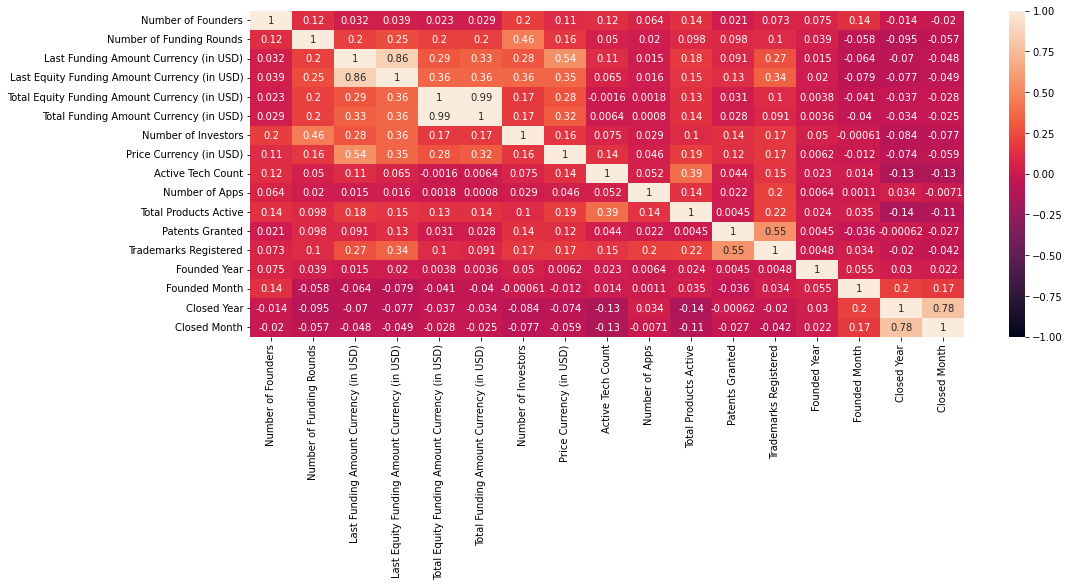

In [20]:
plt.figure(figsize=(16,6))
sns.heatmap(df_startup.corr(), vmin=-1, vmax=1, annot=True)

#number of investors and number of funding rounds 
#trademarks registered and last equity funding amount currency 
#active tech count and total products active 
#patents active and trademarks registered 
#patents active and number of investors 
#Number of founders and number of investors

In [21]:
df_startup['Headquarters Location'].unique()

array(['London, England, United Kingdom',
       'San Francisco, California, United States',
       'San Diego, California, United States',
       'Detroit, Michigan, United States',
       'Carlsbad, California, United States',
       'San Bruno, California, United States', 'Berlin, Berlin, Germany',
       'Miami, Florida, United States',
       'Chicago, Illinois, United States',
       'South Melbourne, Victoria, Australia',
       'Mill Valley, California, United States',
       'Mumbai, Maharashtra, India', 'Marietta, Georgia, United States',
       'Edmond, Oklahoma, United States',
       'Oakland, California, United States',
       'Austin, Texas, United States',
       'New York, New York, United States',
       'Sunnyvale, California, United States',
       'Plano, Texas, United States',
       'Mountain View, California, United States',
       'Tucson, Arizona, United States', 'Tel Aviv, Tel Aviv, Israel',
       'Boston, Massachusetts, United States',
       'Manchester, M

### Importing a dataset with the organization name, industry, and state

In [22]:
df_industry = pd.read_csv('industry.csv')
df_industry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           1154 non-null   object
 1   state_code     1154 non-null   object
 2   category_code  1154 non-null   object
dtypes: object(3)
memory usage: 27.2+ KB


In [23]:
df_industry = df_industry.rename(columns={'name': 'Organization Name'})

### Merging the CrunchBase Dataset with the Industry Dataset

In [24]:
df_startup2 = pd.merge(left=df_startup, right=df_industry, on='Organization Name', how="inner")
df_startup2

Organization Name                                         Industries  \
0              Kluster  Analytics, Artificial Intelligence, Machine Le...   
1               ecoATM  Consumer Electronics, Recycling, Waste Management   
2               Reddit        Content, News, Social Media, Social Network   
3               Aptera        Automotive, Manufacturing, Service Industry   
4                 Kyte  Automotive, Fleet Management, Rental, Software...   
...                ...                                                ...   
1054          Dispatch         Delivery, Information Technology, Software   
1055             Pulse  Crowdsourcing, IT Management, Market Research,...   
1056              Wize                                             EdTech   
1057            Astrid                      E-Learning, EdTech, Education   
1058              Lore  Blockchain, Cryptocurrency, Ethereum, Social N...   

                         Headquarters Location Founded Date Operating Status  \
0              London, England, United Kingdom   2016-08-01           Active   
1         San Diego, California, United States   2008-08-02           Active   
2     San Francisco, California, United States   2005-01-01           Active   
3          Carlsbad, California, United States   2006-01-01           Closed   
4     San Francisco, California, United States   2019-01-01           Active   
...                                        ...          ...              ...   
1054     Bloomington, Minnesota, United States   2016-08-01           Active   
1055  San Francisco, California, United States   2017-04-01           Active   
1056       Vancouver, British Columbia, Canada   2017-07-01           Active   
1057         Stockholm, Stockholms Lan, Sweden   2020-01-01           Active   
1058  San Francisco, California, United States   2020-05-01           Active   

     Closed Date Number of Articles  \
0            NaT                  3   
1            NaT                121   
2            NaT              6,834   
3            NaT                109   
4            NaT                  5   
...          ...                ...   
1054         NaT                  6   
1055         NaT                  6   
1056         NaT                  4   
1057         NaT                N/A   
1058         NaT                N/A   

                                        Industry Groups  Number of Founders  \
0     Artificial Intelligence, Data and Analytics, I...                 2.0   
1        Consumer Electronics, Hardware, Sustainability                 3.0   
2     Content and Publishing, Internet Services, Med...                 3.0   
3                  Manufacturing, Other, Transportation                 2.0   
4       Commerce and Shopping, Software, Transportation                 3.0   
...                                                 ...                 ...   
1054  Administrative Services, Information Technolog...                 2.0   
1055  Community and Lifestyle, Data and Analytics, D...                 2.0   
1056                                Education, Software                 3.0   
1057                                Education, Software                 2.0   
1058  Financial Services, Internet Services, Other, ...                 2.0   

     Number of Employees  ...  Total Products Active Patents Granted  \
0                 Nov-50  ...                   29.0             0.0   
1               501-1000  ...                   36.0            63.0   
2               501-1000  ...                   63.0             0.0   
3                 51-100  ...                    0.0             0.0   
4                101-250  ...                    0.0             0.0   
...                  ...  ...                    ...             ...   
1054             101-250  ...                   25.0             0.0   
1055              10-Jan  ...                   34.0             0.0   
1056              Nov-50  ...                   18.0 

In [25]:
df_startup2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1059 entries, 0 to 1058
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Organization Name                              1059 non-null   object        
 1   Industries                                     1059 non-null   object        
 2   Headquarters Location                          1059 non-null   object        
 3   Founded Date                                   1057 non-null   datetime64[ns]
 4   Operating Status                               1059 non-null   object        
 5   Closed Date                                    231 non-null    datetime64[ns]
 6   Number of Articles                             1059 non-null   object        
 7   Industry Groups                                1059 non-null   object        
 8   Number of Founders                             1059 non-nu

### Exporatory Data Analysis with the Merged Startup Data

In [26]:
# Get a list of the top 10 categories
top10 = df_startup2['category_code'].value_counts()[:10].index
 
# replace the category with 'OTHER' if not in top 10
df_startup2.loc[~df_startup2['category_code'].isin(top10), 'category_code'] = 'other'

Text(0, 0.5, 'Counts')

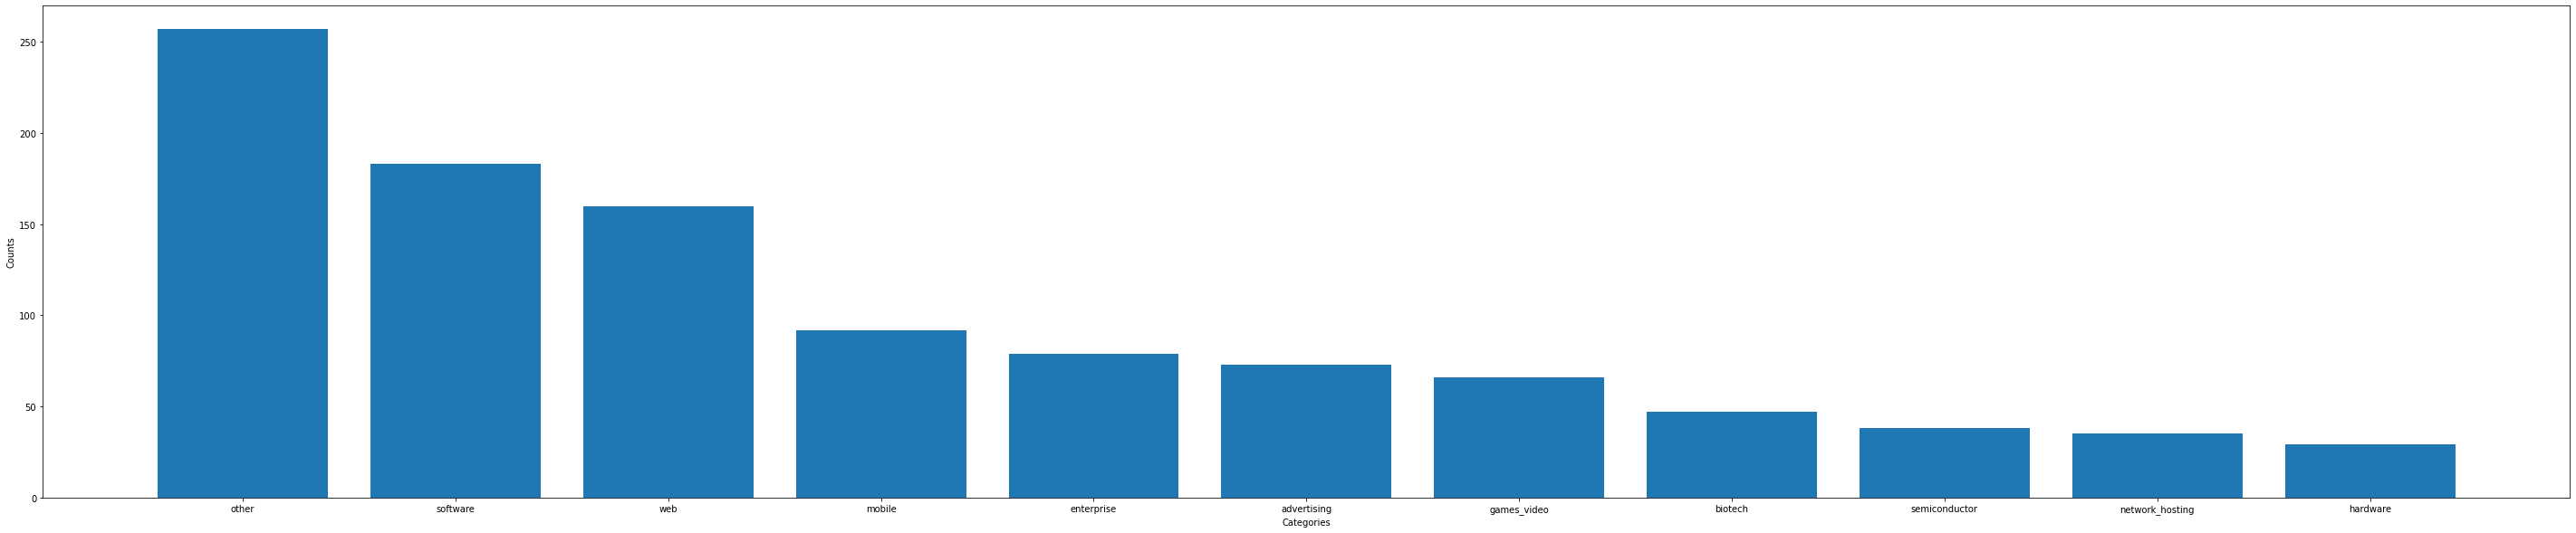

In [27]:
industry = df_startup2["category_code"].value_counts()
fig, ax = plt.subplots(figsize=(50, 10))
plt.bar(industry.index, industry.values)
plt.xlabel("Categories")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

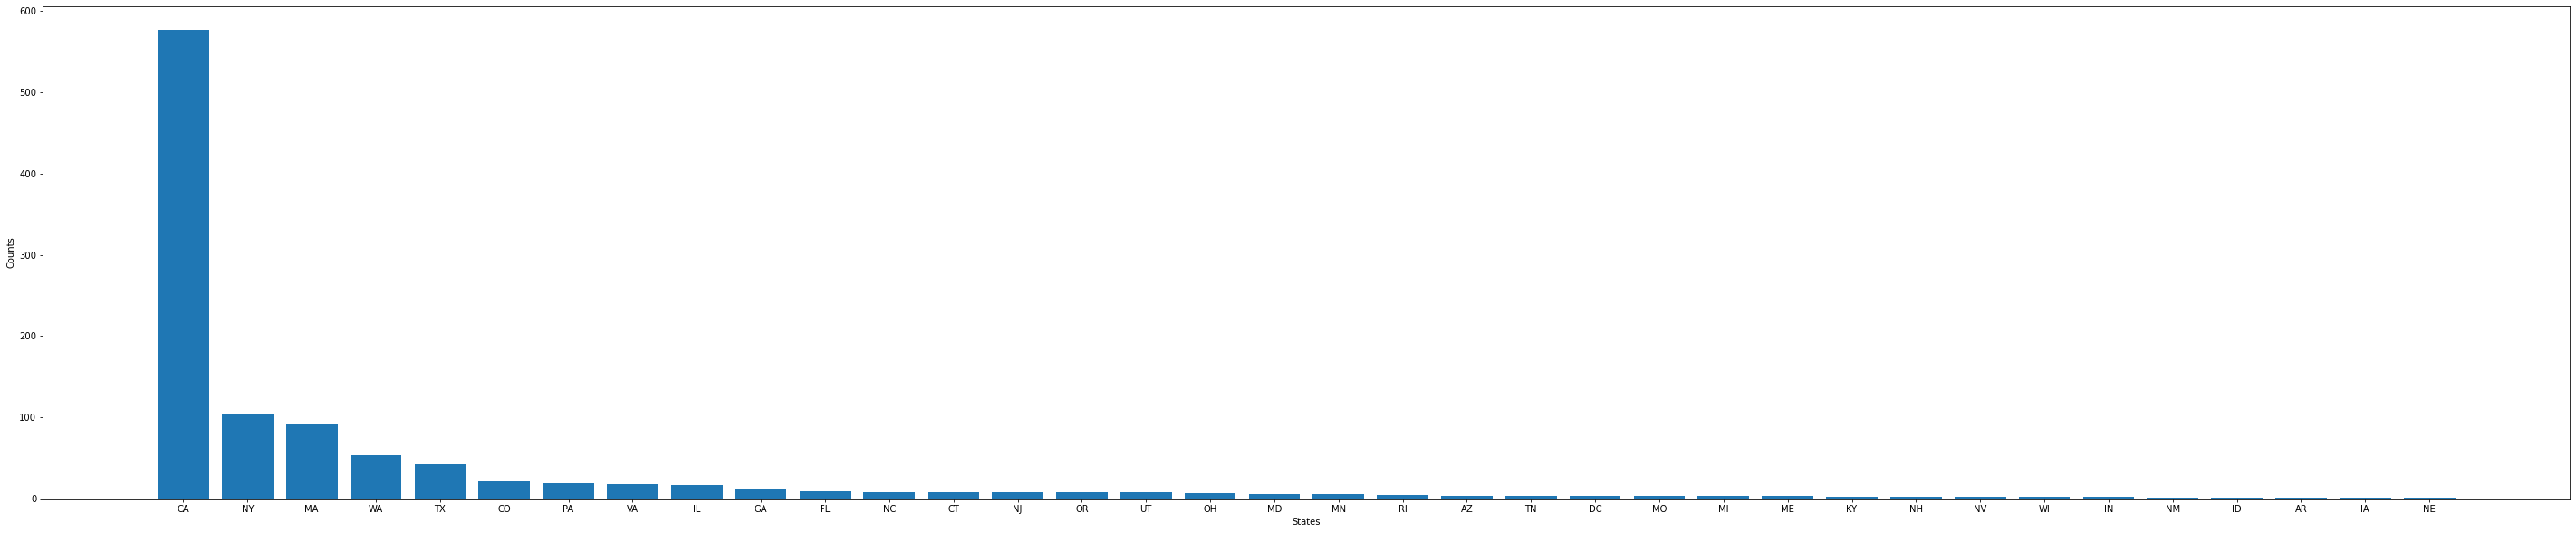

In [28]:
#Viewing number of states
state = df_startup2["state_code"].value_counts()
fig, ax = plt.subplots(figsize=(50, 10))
plt.bar(state.index, state.values)
plt.xlabel("States")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

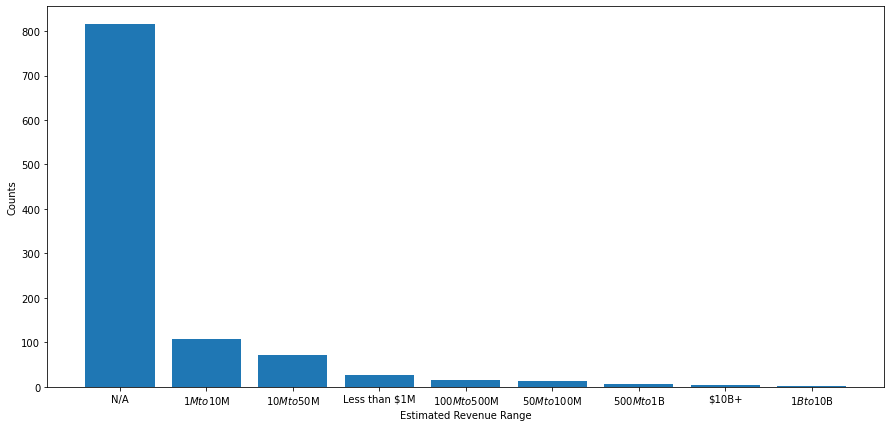

In [29]:
#getting funding counts 
revenue = df_startup2["Estimated Revenue Range"].value_counts()
fig, ax = plt.subplots(figsize=(15, 7))
plt.bar(revenue.index.astype(str), revenue.values)
plt.xlabel("Estimated Revenue Range")
plt.ylabel("Counts")

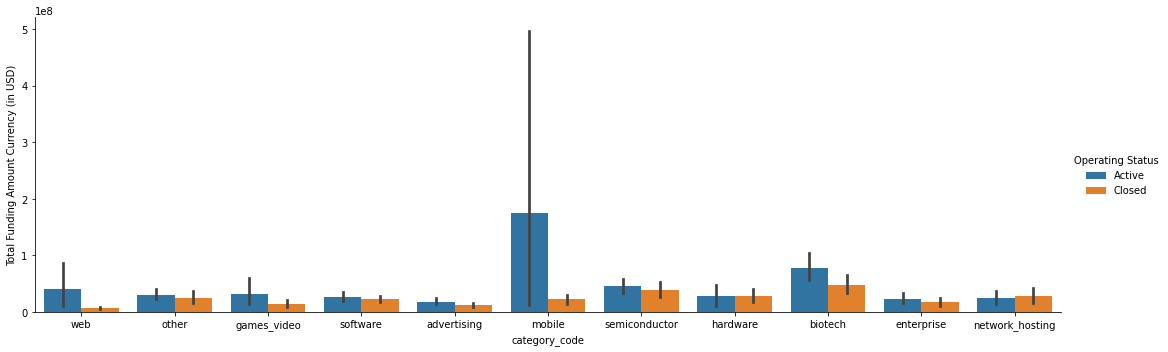

In [30]:
sns.catplot(x = "category_code",       # x variable name
            y = "Total Funding Amount Currency (in USD)",       # y variable name
            hue = "Operating Status",  # group variable name
            data = df_startup2,     # dataframe to plot
            kind = "bar",
            height = 5, aspect = 3)

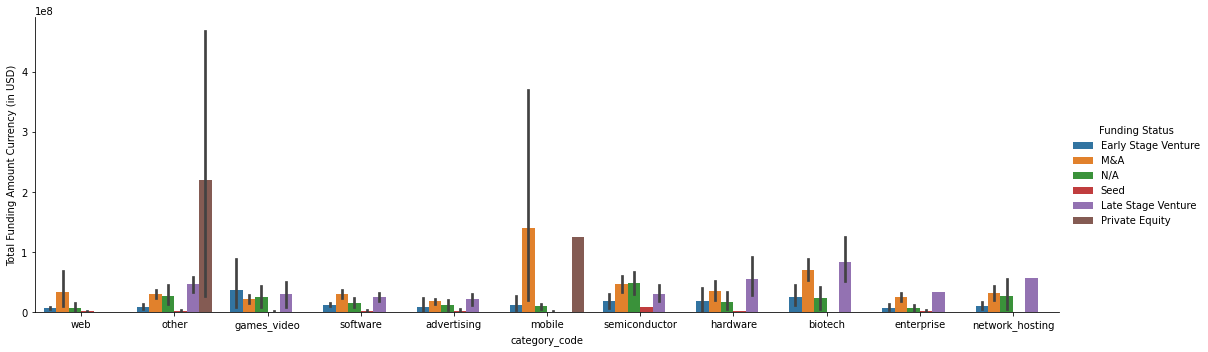

In [31]:
sns.catplot(x = "category_code",       # x variable name
            y = "Total Funding Amount Currency (in USD)",       # y variable name
            hue = "Funding Status",  # group variable name
            data = df_startup2,     # dataframe to plot
            kind = "bar",
            height = 5, aspect = 3)

In [32]:
df_startup2['Founded Year'].unique()

array([2016., 2008., 2005., 2006., 2019., 2015., 2014., 2020., 2004.,
       2017., 2021., 2009., 2018., 2007., 2022., 2010., 2013., 2000.,
          0., 2001., 1996., 2003., 2002., 2011., 1999., 1998., 1997.,
       2012., 1985., 1990., 1995., 1984., 1992., 1978.])

In [33]:
#Changing Founded Year to Year so we are able to match the years of the startup data and the economic data
df_startup2 = df_startup2.rename(columns={'Founded Year': 'Year'})

In [34]:
#Changing Founded Month to Month so we are able to match the months of the startup data with the economic data 
df_startup2 = df_startup2.rename(columns={'Founded Month': 'Month'})

## Merging the Startup Data with the Economic Data

In [35]:
merged_df_test= pd.merge(left=df_startup2, right=econ_data, on =['Year', 'Month'], how ='left')
merged_df_test.head()

Organization Name                                         Industries  \
0           Kluster  Analytics, Artificial Intelligence, Machine Le...   
1            ecoATM  Consumer Electronics, Recycling, Waste Management   
2            Reddit        Content, News, Social Media, Social Network   
3            Aptera        Automotive, Manufacturing, Service Industry   
4              Kyte  Automotive, Fleet Management, Rental, Software...   

                      Headquarters Location Founded Date Operating Status  \
0           London, England, United Kingdom   2016-08-01           Active   
1      San Diego, California, United States   2008-08-02           Active   
2  San Francisco, California, United States   2005-01-01           Active   
3       Carlsbad, California, United States   2006-01-01           Closed   
4  San Francisco, California, United States   2019-01-01           Active   

  Closed Date Number of Articles  \
0         NaT                  3   
1         NaT                121   
2         NaT              6,834   
3         NaT                109   
4         NaT                  5   

                                     Industry Groups  Number of Founders  \
0  Artificial Intelligence, Data and Analytics, I...                 2.0   
1     Consumer Electronics, Hardware, Sustainability                 3.0   
2  Content and Publishing, Internet Services, Med...                 3.0   
3               Manufacturing, Other, Transportation                 2.0   
4    Commerce and Shopping, Software, Transportation                 3.0   

  Number of Employees  ...  Trademarks Registered Estimated Revenue Range  \
0              Nov-50  ...                    0.0           Less than $1M   
1            501-1000  ...                    5.0           $50M to $100M   
2            501-1000  ...                   78.0          $100M to $500M   
3              51-100  ...                    0.0             $1M to $10M   
4             101-250  ...                    1.0             $1M to $10M   

     Year  Month Closed Year  Closed Month state_code  category_code  CPI  \
0  2016.0    8.0         0.0           0.0         NY            web  1.1   
1  2008.0    8.0         0.0           0.0         CA          other  5.3   
2  2005.0    1.0         0.0           0.0         CA            web  2.8   
3  2006.0    1.0         0.0           0.0         CA          other  4.0   
4  2019.0    1.0         0.0           0.0         CA    games_video  1.6   

   Unemployment  
0           4.9  
1           6.1  
2           5.3  
3           4.7  
4           4.0  

[5 rows x 38 columns]

In [36]:
merged_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1059 entries, 0 to 1058
Data columns (total 38 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Organization Name                              1059 non-null   object        
 1   Industries                                     1059 non-null   object        
 2   Headquarters Location                          1059 non-null   object        
 3   Founded Date                                   1057 non-null   datetime64[ns]
 4   Operating Status                               1059 non-null   object        
 5   Closed Date                                    231 non-null    datetime64[ns]
 6   Number of Articles                             1059 non-null   object        
 7   Industry Groups                                1059 non-null   object        
 8   Number of Founders                             1059 non-nu

### Data Wrangling with the Merged Data

In [37]:
merged_df_test['Number of Employees'].unique()

array(['Nov-50', '501-1000', '51-100', '101-250', '1001-5000', '10-Jan',
       '5001-10000', '251-500', '10001+', 'N/A'], dtype=object)

In [38]:
#Replacing the values presented as dates with their respective # of employee ranges 
merged_df_test['Number of Employees'].replace('Nov-50', '11-50', inplace=True)
merged_df_test['Number of Employees'].replace('10-Jan', '1-10', inplace=True)

In [39]:
merged_df_test['Acquisition Status'].unique()

array(['N/A', 'Was Acquired', 'Made Acquisitions, Was Acquired',
       'Made Acquisitions'], dtype=object)

In [40]:
#Creating a new Acquisition Status so it only contains binary variables 
merged_df_test['Acquisition'] = merged_df_test['Acquisition Status'].apply(lambda x: 'Acquired' if ('Was Acquired' in x) or ('Made Acquisitions, Was Acquired' in x) else 'Not Acquired')

In [41]:
#Dropping the Founded Data, Closed Date and Last Funding Dates, since we no longer need them 
merged_df_test = merged_df_test.drop(columns=['Founded Date','Closed Date','Last Funding Date'])

In [42]:
print(merged_df_test.isna().sum())

Organization Name                                0
Industries                                       0
Headquarters Location                            0
Operating Status                                 0
Number of Articles                               0
Industry Groups                                  0
Number of Founders                               0
Number of Employees                              0
Number of Funding Rounds                         0
Funding Status                                   0
Last Funding Amount Currency (in USD)            0
Last Funding Type                                0
Last Equity Funding Amount Currency (in USD)     0
Last Equity Funding Type                         0
Total Equity Funding Amount Currency (in USD)    0
Total Funding Amount Currency (in USD)           0
Number of Investors                              0
Acquisition Status                               0
Acquired by                                      0
Price Currency (in USD)        

In [43]:
#Dropping the rows with missing data 
merged_df_test = merged_df_test.dropna()

In [44]:
#Changing the name of the month and year column back to founded month and founded year
merged_df_test = merged_df_test.rename(columns={'Month': 'Founded Month'})
merged_df_test = merged_df_test.rename(columns={'Year': 'Founded Year'})

#Changing the names of the states and industry columns 
merged_df_test = merged_df_test.rename(columns={'state_code': 'State'})
merged_df_test = merged_df_test.rename(columns={'category_code': 'Industry'})

In [45]:
#Replacing "N/A" with 0 and converting the Number of Articles column to a float
merged_df_test['Number of Articles'].replace('N/A', '0', inplace=True)
merged_df_test['Number of Articles'] = merged_df_test['Number of Articles'].str.replace(',', '').astype(float)

In [46]:
#Converting Founded Month to an object 
merged_df_test['Founded Month'] = merged_df_test['Founded Month'].astype(object)

In [47]:
#Dropping columns we no longer need from the merged dataset/columns that are redundant 
merged_df_test = merged_df_test.drop(columns=['Organization Name','Industries','Headquarters Location','Acquired by', 'Industry Groups', 'Operating Status', 'Acquisition Status', 'Last Funding Amount Currency (in USD)','Last Equity Funding Amount Currency (in USD)', 'Number of Articles', 'Number of Apps', 'Active Tech Count', 'Funding Status', 'Number of Founders'], axis=1)

In [48]:
merged_df_test.describe()

Number of Funding Rounds  \
count               1057.000000   
mean                   3.030274   
std                    1.933318   
min                    0.000000   
25%                    2.000000   
50%                    3.000000   
75%                    4.000000   
max                   17.000000   

       Total Equity Funding Amount Currency (in USD)  \
count                                   1.057000e+03   
mean                                    2.925149e+07   
std                                     1.868314e+08   
min                                     0.000000e+00   
25%                                     2.850000e+06   
50%                                     1.080000e+07   
75%                                     3.015000e+07   
max                                     5.864000e+09   

       Total Funding Amount Currency (in USD)  Number of Investors  \
count                            1.057000e+03          1057.000000   
mean                             3.201847e+07             4.649007   
std                              2.161818e+08             3.800765   
min                              0.000000e+00             0.000000   
25%                              3.000000e+06             2.000000   
50%                              1.145000e+07             4.000000   
75%                              3.141000e+07             6.000000   
max                              6.784000e+09            33.000000   

       Price Currency (in USD)  Total Products Active  Patents Granted  \
count             1.057000e+03            1057.000000      1057.000000   
mean              5.390982e+07               7.219489         2.079470   
std               2.322759e+08              10.930006        14.141912   
min               0.000000e+00               0.000000         0.000000   
25%               0.000000e+00               0.000000         0.000000   
50%               0.000000e+00               4.000000         0.000000   
75%               0.000000e+00              10.000000         0.000000   
max               4.000000e+09             125.000000       385.000000   

       Trademarks Registered  Founded Year  Closed Year  Closed Month  \
count            1057.000000   1057.000000  1057.000000   1057.000000   
mean                0.763482   2005.771050   439.630085      1.145695   
std                 5.908301      4.354834   831.720170      2.769826   
min                 0.000000   1978.000000     0.000000      0.000000   
25%                 0.000000   2003.000000     0.000000      0.000000   
50%                 0.000000   2006.000000     0.000000      0.000000   
75%                 0.000000   2008.000000     0.000000      0.000000   
max                97.000000   2022.000000  2022.000000     12.000000   

               CPI  Unemployment  
count  1057.000000   1057.000000  
mean      2.560360      5.816083  
std       1.381722      1.770825  
min      -2.000000      3.500000  
25%       2.000000      4.600000  
50%       2.800000      5.300000  
75%       3.600000      5.800000  
max       8.200000     13.200000

In [49]:
merged_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1057 entries, 0 to 1058
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Number of Employees                            1057 non-null   object 
 1   Number of Funding Rounds                       1057 non-null   float64
 2   Last Funding Type                              1057 non-null   object 
 3   Last Equity Funding Type                       1057 non-null   object 
 4   Total Equity Funding Amount Currency (in USD)  1057 non-null   float64
 5   Total Funding Amount Currency (in USD)         1057 non-null   float64
 6   Number of Investors                            1057 non-null   float64
 7   Price Currency (in USD)                        1057 non-null   float64
 8   IPO Status                                     1057 non-null   object 
 9   Total Products Active                          1057 

## Pre Processing Steps

In [50]:
#Scaling our Funding Features, since those values are significantly larger than the other values 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_cols = ['Total Equity Funding Amount Currency (in USD)', 
            'Total Funding Amount Currency (in USD)',
            'Price Currency (in USD)']

scaled_num_df = merged_df_test[num_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
    ])
transformed_data = preprocessor.fit_transform(merged_df_test)

scaled_num_cols = preprocessor.transformers_[0][2]

scaled_num_df = pd.DataFrame(transformed_data, columns=num_cols)
merged_df_test[scaled_num_cols] = scaled_num_df

scaled_mean = scaled_num_df.mean()
scaled_std = scaled_num_df.std()

print("Scaled mean:", scaled_mean)
print("Scaled std:", scaled_std)

Scaled mean: Total Equity Funding Amount Currency (in USD)    1.710500e-16
Total Funding Amount Currency (in USD)          -1.003087e-17
Price Currency (in USD)                          5.022262e-16
dtype: float64
Scaled std: Total Equity Funding Amount Currency (in USD)    1.000473
Total Funding Amount Currency (in USD)           1.000473
Price Currency (in USD)                          1.000473
dtype: float64


In [51]:
merged_df_test.describe()

Number of Funding Rounds  \
count               1057.000000   
mean                   3.030274   
std                    1.933318   
min                    0.000000   
25%                    2.000000   
50%                    3.000000   
75%                    4.000000   
max                   17.000000   

       Total Equity Funding Amount Currency (in USD)  \
count                                    1055.000000   
mean                                       -0.000055   
std                                         1.001411   
min                                        -0.156640   
25%                                        -0.141513   
50%                                        -0.098807   
75%                                         0.004811   
max                                        31.244799   

       Total Funding Amount Currency (in USD)  Number of Investors  \
count                             1055.000000          1057.000000   
mean                                -0.000024             4.649007   
std                                  1.001414             3.800765   
min                                 -0.148179             0.000000   
25%                                 -0.134295             2.000000   
50%                                 -0.095560             4.000000   
75%                                 -0.003186             6.000000   
max                                 31.247675            33.000000   

       Price Currency (in USD)  Total Products Active  Patents Granted  \
count              1055.000000            1057.000000      1057.000000   
mean                  0.000440               7.219489         2.079470   
std                   1.001371              10.930006        14.141912   
min                  -0.232204               0.000000         0.000000   
25%                  -0.232204               0.000000         0.000000   
50%                  -0.232204               4.000000         0.000000   
75%                  -0.232204              10.000000         0.000000   
max                  16.996851             125.000000       385.000000   

       Trademarks Registered  Founded Year  Closed Year  Closed Month  \
count            1057.000000   1057.000000  1057.000000   1057.000000   
mean                0.763482   2005.771050   439.630085      1.145695   
std                 5.908301      4.354834   831.720170      2.769826   
min                 0.000000   1978.000000     0.000000      0.000000   
25%                 0.000000   2003.000000     0.000000      0.000000   
50%                 0.000000   2006.000000     0.000000      0.000000   
75%                 0.000000   2008.000000     0.000000      0.000000   
max                97.000000   2022.000000  2022.000000     12.000000   

               CPI  Unemployment  
count  1057.000000   1057.000000  
mean      2.560360      5.816083  
std       1.381722      1.770825  
min      -2.000000      3.500000  
25%       2.000000      4.600000  
50%       2.800000      5.300000  
75%       3.600000      5.800000  
max       8.200000     13.200000

In [52]:
merged_df_test = merged_df_test.dropna()

In [53]:
#Encoding the labels 
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
Y = encoder.fit_transform(merged_df_test['Acquisition'])
X = merged_df_test.drop(['Acquisition'], axis=1)

for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype('category')

X = pd.get_dummies(data=X, drop_first=True)

In [54]:
X.head()

Number of Funding Rounds  Total Equity Funding Amount Currency (in USD)  \
0                       2.0                                      -0.124511   
1                       9.0                                       0.680874   
2                      10.0                                       6.960358   
3                       9.0                                       0.370019   
4                       9.0                                       0.373500   

   Total Funding Amount Currency (in USD)  Number of Investors  \
0                               -0.120412                  5.0   
1                                1.693347                 11.0   
2                                6.002566                 33.0   
3                                0.318547                 11.0   
4                                1.235571                 30.0   

   Price Currency (in USD)  Total Products Active  Patents Granted  \
0                -0.232204                   29.0              0.0   
1                 1.275339                   36.0             63.0   
2                -0.232204                   63.0              0.0   
3                -0.232204                    0.0              0.0   
4                -0.232204                    0.0              0.0   

   Trademarks Registered  Founded Year  Closed Year  ...  Industry_biotech  \
0                    0.0        2016.0          0.0  ...                 0   
1                    5.0        2008.0          0.0  ...                 0   
2                   78.0        2005.0          0.0  ...                 0   
3                    0.0        2006.0          0.0  ...                 0   
4                    1.0        2019.0          0.0  ...                 0   

   Industry_enterprise  Industry_games_video  Industry_hardware  \
0                    0                     0                  0   
1                    0                     0                  0   
2                    0                     0                  0   
3                    0                     0                  0   
4                    0                     1                  0   

   Industry_mobile  Industry_network_hosting  Industry_other  \
0                0                         0               0   
1                0                         0               1   
2                0                         0               0   
3                0                         0               1   
4                0                         0               0   

   Industry_semiconductor  Industry_software  Industry_web  
0                       0                  0             1  
1                       0                  0             0  
2                       0                  0             1  
3                       0                  0             0  
4                       0                  0             0  

[5 rows x 121 columns]

In [55]:
#Train-Test-Split (70-30 Split)
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=200)

## Models and Model Evaluation

### Logistic Regression 

In [56]:
# create data frame to collect test accuracy score values for different model types
acc_table = pd.DataFrame({"Accuracy": [0,0,0,0]}, 
                  index=["Logistic Regression","SVM","KNN","Random Forest"])
acc_table

Accuracy
Logistic Regression         0
SVM                         0
KNN                         0
Random Forest               0

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(random_state=0, max_iter=20000, solver='lbfgs').fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

print('In-sample accuracy score:', accuracy_score(y_train, model.predict(X_train)))
print('Out-of-sample accuracy score:', accuracy_score(y_test, y_pred))

Coefficients: [[-1.57475199e-01 -1.29643550e-01 -1.07885672e-01 -8.77313007e-02
   4.95489117e-02  6.43557816e-03 -6.10618528e-02 -1.35891647e-02
   6.88464938e-04  3.10282112e-04  8.64310600e-02 -6.33557361e-02
  -1.94278801e-01 -1.50235218e+00 -1.36438230e+00 -9.25186635e-01
  -1.64891961e-01 -9.43750038e-01 -1.07662999e+00 -1.78634194e+00
  -1.06632374e+00  7.41295631e-01  5.87647075e-01  1.37731785e-01
   5.88830820e-01 -4.26447881e-02  5.45288661e-01 -3.68514849e-03
   6.16926398e-01 -4.86197862e-01 -2.94380694e-01  4.69261432e-01
  -5.71228721e-02 -8.66817355e-01 -4.08093944e-01 -4.29492941e-01
  -8.46293068e-01 -3.00773513e-01 -1.00983404e-02  2.34435221e-01
   2.48200165e-01  5.88830820e-01  6.27291644e-01 -3.68514849e-03
   1.02520139e+00 -1.23411855e-01  1.42512745e-01 -3.86372045e-01
  -5.83995302e-01 -6.56841927e-01 -1.98033703e-01 -4.17478183e-01
  -3.61640634e-01 -1.00983404e-02  2.34435221e-01 -6.96337185e-01
   1.84490232e-01  0.00000000e+00 -1.67913196e-01 -7.74639165e

In [58]:
y_prob = model.predict_proba(X_test)
print('Predicted probabilities:', y_prob)

Predicted probabilities: [[6.39490874e-01 3.60509126e-01]
 [5.74474220e-01 4.25525780e-01]
 [9.42510045e-01 5.74899547e-02]
 [4.48613261e-01 5.51386739e-01]
 [7.83864212e-01 2.16135788e-01]
 [5.56702725e-01 4.43297275e-01]
 [3.76641302e-01 6.23358698e-01]
 [4.76749838e-01 5.23250162e-01]
 [4.14305212e-01 5.85694788e-01]
 [7.71032653e-01 2.28967347e-01]
 [4.55566733e-01 5.44433267e-01]
 [4.95231308e-01 5.04768692e-01]
 [6.19069694e-01 3.80930306e-01]
 [7.27557670e-01 2.72442330e-01]
 [5.90542151e-01 4.09457849e-01]
 [6.15600731e-01 3.84399269e-01]
 [9.17066863e-01 8.29331366e-02]
 [3.15432123e-01 6.84567877e-01]
 [2.63360521e-01 7.36639479e-01]
 [9.83956269e-01 1.60437306e-02]
 [8.81375563e-01 1.18624437e-01]
 [6.83376513e-01 3.16623487e-01]
 [9.24854958e-01 7.51450418e-02]
 [4.60392593e-01 5.39607407e-01]
 [3.01525925e-01 6.98474075e-01]
 [3.94526155e-01 6.05473845e-01]
 [7.14458695e-01 2.85541305e-01]
 [6.91890208e-01 3.08109792e-01]
 [2.84788634e-01 7.15211366e-01]
 [9.09827793e-01 9

In [59]:
model.classes_
#probability of failure = 0 
#probability of success = 1

array([0, 1])

#### Model Evaluation

Score in each fold: [0.77702703 0.74324324 0.72297297 0.73469388 0.72108844]
0.74 accuracy with a standard deviation of 0.02


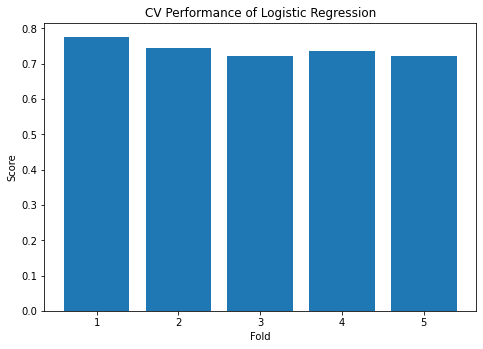

In [60]:
#Cross Validation
K=5
scores = cross_val_score(model,X_train,y_train,cv=K,scoring='accuracy')
print('Score in each fold:', scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(1,K+1),scores)
plt.xlabel("Fold")
plt.ylabel("Score")
plt.title('CV Performance of Logistic Regression')
plt.show()

In [61]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

grid = GridSearchCV(model, hyperparameters, cv=5, scoring='accuracy')

grid.fit(X_test, y_test)

print("Best hyperparameters:", grid.best_params_)
print("Accuracy score:", grid.best_score_)

/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

Best hyperparameters: {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score: 0.7100198412698413


/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [62]:
acc_table.loc['Logistic Regression','Accuracy'] = grid.best_score_
#Accuracy score for Logistic Regression changed

In [63]:
acc_table

Accuracy
Logistic Regression   0.71002
SVM                   0.00000
KNN                   0.00000
Random Forest         0.00000

#### Interpreting LG with ELI5

In [64]:
eli5.show_weights(grid, feature_names=np.array(X_test.columns), show_feature_values=True)
#global interpretation - Look at a model’s parameters and figure out at a global level how the model works

In [65]:
eli5.show_prediction(grid, X_test.iloc[1], feature_names=np.array(X_test.columns), show_feature_values=True)
#Local Interpretation: Look at a single prediction and identify features leading to that prediction

In [66]:
eli5.show_weights(model, feature_names=np.array(X_test.columns), show_feature_values=True)

In [67]:
eli5.show_prediction(model, X_test.iloc[1], feature_names=np.array(X_test.columns), show_feature_values=True)

In [68]:
#Elastic Net
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

ENcv = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(X_train, y_train)

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

The best alpha from ElasticNetCV: 0.1872178120019673


In [69]:
ENcv.score(X_test, y_test)

0.12990274275645697

In [70]:
ENcv.predict(X_test)

array([ 0.62260426,  0.52115437,  0.26858073,  0.36563675,  0.35270571,
        0.26279737,  0.53509028,  0.28293139,  0.23698109,  0.37677858,
        0.59668234,  0.36947635,  0.18817935,  0.32868839,  0.29816219,
        0.30184659,  0.12807359,  0.45542806,  0.60975245,  0.10403592,
        0.09836598,  0.3917155 ,  0.29467779,  0.3104964 ,  0.71863222,
        0.35388707,  0.28721498,  0.44550701,  0.63363069,  0.33514711,
        0.29744366,  0.3433976 , -0.01213014,  0.36407526,  0.18897548,
        0.70598366,  0.66815686,  0.55889333,  0.59214617,  0.6438673 ,
        0.49995402,  0.52311185,  0.38368965,  0.37835744,  0.30258758,
        0.73089046,  0.37925323,  0.36741492,  0.6911842 ,  0.1356248 ,
        0.24416502,  0.36140598,  0.015687  ,  0.66900491,  0.38980927,
        0.40601743,  0.31554577,  0.34981785,  0.35769953,  0.35270571,
        0.35204232,  0.32103633,  0.55519627,  0.19078039,  0.26042873,
        0.57871175,  0.65606284,  0.36765366,  0.38235184,  0.63

In [71]:
EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(X_train, y_train)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X_train.columns))

The coefficients are:
Number of Funding Rounds                        -0.004242
Total Equity Funding Amount Currency (in USD)   -0.000000
Total Funding Amount Currency (in USD)          -0.000000
Number of Investors                             -0.019853
Price Currency (in USD)                         -0.000000
                                                   ...   
Industry_network_hosting                        -0.000000
Industry_other                                  -0.000000
Industry_semiconductor                           0.000000
Industry_software                               -0.000000
Industry_web                                    -0.000000
Length: 121, dtype: float64


In [72]:
# Logistic Regression with Elastic Net 

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report

# Basic LogisticRegression algorithm
logistic_regression_classifier = LogisticRegressionCV(cv=3)

elastic_net_classifier = LogisticRegressionCV(cv=3, penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9], solver='saga')

# Train the models
logistic_regression_classifier.fit(X_train, y_train)
elastic_net_classifier.fit(X_train, y_train)

# Test the models
print("Logistic Regression: {} || Elasticnet: {}".format(logistic_regression_classifier.score(X_test, y_test), elastic_net_classifier.score(X_test, y_test)))

# Print out some more metrics
print("Logistic Regression")
print(classification_report(y_test, logistic_regression_classifier.predict(X_test)))
print("Elastic Net")
print(classification_report(y_test, elastic_net_classifier.predict(X_test)))

/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

Logistic Regression: 0.6782334384858044 || Elasticnet: 0.6624605678233438
Logistic Regression
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       203
           1       0.57      0.46      0.50       114

    accuracy                           0.68       317
   macro avg       0.64      0.63      0.63       317
weighted avg       0.67      0.68      0.67       317

Elastic Net
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       203
           1       0.55      0.35      0.43       114

    accuracy                           0.66       317
   macro avg       0.62      0.59      0.59       317
weighted avg       0.64      0.66      0.64       317



/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### SVM

In [73]:
from sklearn.svm import SVC 
import numpy as np

model = SVC(kernel='linear', C=1, random_state=0) 
model.fit(X_train, y_train)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

from sklearn.metrics import accuracy_score
print('In-sample accuracy score:',accuracy_score(y_train, model.predict(X_train)))
print('Out-of-sample accuracy score:',accuracy_score(y_test, model.predict(X_test)))

Coefficients: [[-6.75434859e-01 -7.68156543e-01  1.80339654e-01 -1.69203981e-01
   1.05965674e-01 -1.94083125e-03 -9.38021920e-02 -1.90073429e-03
   3.24065973e-03  4.63391551e-04  2.57366826e-01 -4.71280672e-01
  -3.31183381e-01 -1.47728141e+00 -7.71711710e-01 -2.47368928e+00
  -3.72760833e-01 -1.13529218e+00 -3.00000000e+00 -4.01531232e+00
  -2.05407649e+00  2.00000000e+00  1.78968004e+00  5.58662532e-01
   1.00000000e+00  1.52766702e-01  1.15634737e+00  0.00000000e+00
   1.22536075e+00 -1.09081471e-01 -1.00000000e+00  6.26082895e-01
  -6.62421484e-01 -2.94125207e+00 -3.52156579e-01 -7.75030360e-01
  -1.21274254e+00 -4.46012015e-01  0.00000000e+00  0.00000000e+00
   1.20426118e+00  1.00000000e+00  1.15634737e+00  0.00000000e+00
   1.37812745e+00 -1.09081471e-01  6.26082895e-01 -6.62421484e-01
   5.87479319e-02 -1.56247654e+00 -3.42504717e-01 -4.95613346e-01
   1.69543025e-01  0.00000000e+00  0.00000000e+00 -2.00228617e+00
   7.90478794e-14  0.00000000e+00 -7.19075027e-01 -3.91499662e

In [74]:
svm_acc = accuracy_score(y_test, model.predict(X_test))

In [75]:
acc_table.loc['SVM','Accuracy'] = svm_acc

In [76]:
acc_table

Accuracy
Logistic Regression  0.710020
SVM                  0.716088
KNN                  0.000000
Random Forest        0.000000

#### Interpreting SVM with ELI5

In [77]:
eli5.show_weights(model,feature_names=np.array(X_test.columns))

In [78]:
eli5.show_prediction(model, X_test.iloc[1], feature_names=np.array(X_test.columns), show_feature_values=True)

In [79]:
y_test[1]

1

In [80]:
y_pred[1]

0

In [81]:
eli5.show_prediction(model, X_test.iloc[36], feature_names=np.array(X_test.columns), show_feature_values=True)

In [82]:
y_test[36]

1

In [83]:
y_pred[36]

1

### KNN 

In [84]:
from sklearn.neighbors import KNeighborsClassifier

acc_train = [-1]*30
acc_test = [-1]*30

In [85]:
for K in range(30):
    model = KNeighborsClassifier(n_neighbors = K+1)
    model.fit(X_train,y_train)  #fit the model
    acc_train[K] = accuracy_score(y_train, model.predict(X_train))
    acc_test[K] = accuracy_score(y_test, model.predict(X_test)) 

In [86]:
# optimal k (max accuracy value)
np.argmax(acc_test)+1

9

In [87]:
# optimal accuracy
max(acc_test)

0.7192429022082019

In [88]:
acc_table.loc['KNN','Accuracy'] = max(acc_test)

### Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [90]:
class_RF = RandomForestClassifier(n_estimators=10, random_state=0).fit(scale(X_train), y_train) 

In [91]:
y_pred=class_RF.predict(scale(X_test.values))
acc_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy for Random Forest is {acc_rf}")

Accuracy for Random Forest is 0.6908517350157729


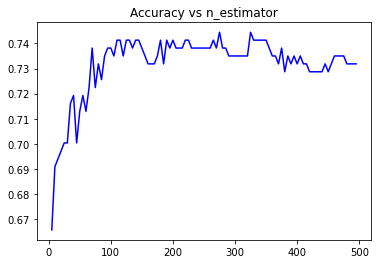

In [92]:
acc_list = []
n_list = np.arange(5,500,5)
for n in n_list:
    class_RF = RandomForestClassifier(n_estimators=n,random_state=0).fit(scale(X_train), y_train)
    y_pred=class_RF.predict(scale(X_test.values))
    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)

plt.plot(n_list, acc_list,  color = 'blue', markerfacecolor = 'black',label = 'Accuracy')
plt.title('Accuracy vs n_estimator')
plt.show()

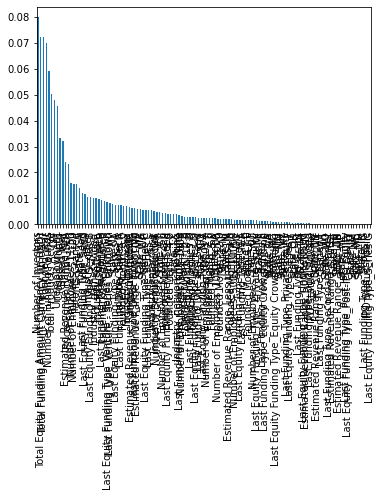

In [93]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(class_RF.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [94]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2',None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000]}


In [95]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(scale(X_train), y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=733; total time=   1.1s
[CV] END bootstrap=True, max_depth=80, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=1577; total time=   6.5s
[CV] END bootstrap=True, max_depth=80, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=1577; total time=   6.5s
[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   6.9s
[CV] END bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=1155; total time=   5.1s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=311; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimat

/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, max_depth=70, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=522; total time=   0.7s
[CV] END bootstrap=False, max_depth=70, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=311; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=1577; total time=   6.7s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1366; total time=   2.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1366; total time=   2.7s
[CV] END bootstrap=True, max_depth=70, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=70, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, ma

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, verbose=2)

In [96]:
rf_random.best_params_

{'n_estimators': 311,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [97]:
best_rd = rf_random.best_estimator_

In [98]:
y_pred=best_rd.predict(scale(X_test.values))
acc_best_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy is {acc_best_rf}")

Accuracy is 0.7444794952681388


In [99]:
acc_table.loc['Random Forest','Accuracy'] = acc_best_rf

In [100]:
acc_table

Accuracy
Logistic Regression  0.710020
SVM                  0.716088
KNN                  0.719243
Random Forest        0.744479

In [101]:
y_prob = best_rd.predict_proba(X_test)
print('Predicted probabilities:', y_prob)

Predicted probabilities: [[0.55397626 0.44602374]
 [0.5419288  0.4580712 ]
 [0.47094656 0.52905344]
 [0.37748919 0.62251081]
 [0.41550795 0.58449205]
 [0.48548746 0.51451254]
 [0.58093352 0.41906648]
 [0.36871494 0.63128506]
 [0.44432955 0.55567045]
 [0.4232948  0.5767052 ]
 [0.47897896 0.52102104]
 [0.4998876  0.5001124 ]
 [0.48004681 0.51995319]
 [0.43527278 0.56472722]
 [0.39819282 0.60180718]
 [0.38731676 0.61268324]
 [0.43180103 0.56819897]
 [0.4755144  0.5244856 ]
 [0.43852062 0.56147938]
 [0.49556763 0.50443237]
 [0.4461646  0.5538354 ]
 [0.45594906 0.54405094]
 [0.43445074 0.56554926]
 [0.4958885  0.5041115 ]
 [0.51430377 0.48569623]
 [0.44358332 0.55641668]
 [0.39166418 0.60833582]
 [0.43507005 0.56492995]
 [0.45845027 0.54154973]
 [0.4607494  0.5392506 ]
 [0.44370149 0.55629851]
 [0.53045276 0.46954724]
 [0.43875589 0.56124411]
 [0.49615512 0.50384488]
 [0.42359286 0.57640714]
 [0.43420634 0.56579366]
 [0.46291967 0.53708033]
 [0.52866082 0.47133918]
 [0.47231198 0.52768802]


/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [102]:
X_test

Number of Funding Rounds  Total Equity Funding Amount Currency (in USD)  \
500                        2.0                                       1.680108   
666                        3.0                                      -0.028121   
50                        10.0                                      -0.142985   
227                        2.0                                      -0.142717   
479                        3.0                                      -0.154364   
...                        ...                                            ...   
413                        4.0                                      -0.022767   
1016                       2.0                                      -0.150214   
143                        3.0                                      -0.037225   
572                        2.0                                      -0.127188   
627                        6.0                                      -0.150991   

      Total Funding Amount Currency (in USD)  Number of Investors  \
500                                 3.058974                  3.0   
666                                -0.037109                  5.0   
50                                 -0.122031                  6.0   
227                                -0.136147                  3.0   
479                                -0.146212                  3.0   
...                                      ...                  ...   
413                                -0.032481                  6.0   
1016                               -0.142626                  3.0   
143                                -0.044976                  2.0   
572                                -0.122726                  4.0   
627                                -0.142371                  3.0   

      Price Currency (in USD)  Total Products Active  Patents Granted  \
500                  2.214322                    0.0              0.0   
666                 -0.232204                    1.0              0.0   
50                  -0.115908                   23.0              0.0   
227                 -0.232204                    2.0              0.0   
479                 -0.232204                    0.0              0.0   
...                       ...                    ...              ...   
413                 -0.102986                    0.0              1.0   
1016                -0.232204                    5.0             17.0   
143                  1.275339                   14.0              0.0   
572                 -0.124522                    6.0              0.0   
627                 -0.232204                    0.0              3.0   

      Trademarks Registered  Founded Year  Closed Year  ...  Industry_biotech  \
500                     0.0        2007.0       2013.0  ...                 0   
666                     2.0        2002.0       2009.0  ...                 0   
50                      0.0        2009.0          0.0  ...                 0   
227                     0.0        2007.0          0.0  ...                 0   
479                     0.0        2006.0          0.0  ...                 0   
...                     ...           ...          ...  ...               ...   
413                     0.0        2001.0          0.0  ...                 0   
1016                    2.0        2010.0          0.0  ...                 0   
143                     0.0        2006.0          0.0  ...                 0   
572                     0.0        2002.0          0.0  ...                 0   
627                     0.0        2006.0       2012.0  ...                 0   

      Industry_enterprise  Industry_games_video  Industry_hardware  \
500                     0                     0                  0   
666                     0                     0                  0   
50                      1                     0                  0   
227                     0                     0                  0   
479 

#### Interpreting RF with ELI5

In [103]:
eli5.show_weights(best_rd, feature_names=np.array(X_test.columns))
#eli5.show_weights(best_rd, feature_names=np.array(X_test.columns), top=121) shows all variables

In [104]:
eli5.show_prediction(best_rd, X_test.iloc[36], feature_names=np.array(X_test.columns), show_feature_values=True)
#this shows individual prediction for index row 36 (i just chose a random row)

/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/ste

/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/ste

In [105]:
y_test[36]

1

In [106]:
y_pred[36]

1

In [107]:
eli5.show_prediction(best_rd, X_test.iloc[1], feature_names=np.array(X_test.columns), show_feature_values=True)

/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/ste

/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/ste

In [108]:
y_test[1]

1

In [109]:
y_pred[1]

0

### Model Comparison - Classifiers

In [110]:
acc_table
#Random forest is the most accurate model

Accuracy
Logistic Regression  0.710020
SVM                  0.716088
KNN                  0.719243
Random Forest        0.744479

Note: Due to random state changes, model accuracy changes. 

### Linear Regression - For Total Funding Amount

In [111]:
# Define X and y
X = merged_df_test.drop(columns=['Total Funding Amount Currency (in USD)'], axis=1)
y = merged_df_test['Total Funding Amount Currency (in USD)']

for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype('category')
X = pd.get_dummies(data=X, drop_first=True)

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)


# Create LinearRegression object and fit to training data
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predict y values for test data
y_pred = linear_regressor.predict(X_test)

# Display coefficients
coefficients = pd.Series(linear_regressor.coef_.flatten(), index=X_train.columns)
print("Coefficients:")
print(coefficients)

# Calculate training and test MSE
mse_train = mean_squared_error(y_train, linear_regressor.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Training MSE:", mse_train)
print("Test MSE:", mse_test)
print("MSE:", round(mean_squared_error(y_test, y_pred), 3))

Coefficients:
Number of Funding Rounds                         0.000569
Total Equity Funding Amount Currency (in USD)    1.001847
Number of Investors                              0.000824
Price Currency (in USD)                         -0.010034
Total Products Active                           -0.000189
                                                   ...   
Industry_other                                  -0.003161
Industry_semiconductor                           0.006109
Industry_software                                0.011877
Industry_web                                     0.000929
Acquisition_Not Acquired                         0.002508
Length: 121, dtype: float64
Training MSE: 0.0055476771585391
Test MSE: 0.015011896011066611
MSE: 0.015


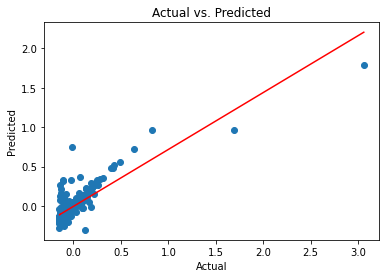

In [112]:
plt.scatter(y_test, y_pred)
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [113]:
k_value = [k for k in range(2, 10)]
MSE_train = []
MSE_test = []

x_train_extend = X_train
x_test_extend = X_test
    
for k in k_value:
    
    # Add x^k into the training and test data
    x_train_extend = np.concatenate((x_train_extend, X_train**k), axis=1)
    x_test_extend = np.concatenate((x_test_extend, X_test**k), axis=1)

    # Train the model using the training sets
    linear_regressor.fit(x_train_extend,y_train)

    # Record training MSE
    MSE_train.append(mean_squared_error(y_train, linear_regressor.predict(x_train_extend)))

    # Record test MSE
    MSE_test.append(mean_squared_error(y_test, linear_regressor.predict(x_test_extend)))      

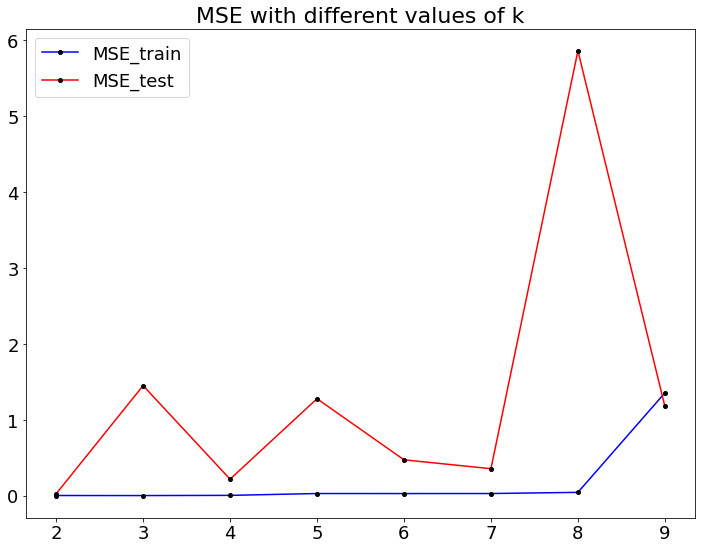

In [114]:
import matplotlib.pyplot as plt
# plot the train and test MSE values for various orders of K
# select model with minimum test MSE
fig, ax1 = plt.subplots(figsize=(12, 9))
plt.plot(k_value, MSE_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'MSE_train')
plt.plot(k_value, MSE_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'MSE_test')
plt.legend(fontsize=18)
plt.title('MSE with different values of k', fontsize=22)
plt.tick_params(labelsize=18)
plt.show()

In [115]:
MSE_test

[0.027150970412346334,
 1.4522453008159744,
 0.21953106666125322,
 1.279591694986612,
 0.47477954573744596,
 0.35763870114086044,
 5.862068077439893,
 1.1793496464394213]

#### Model Evaluation

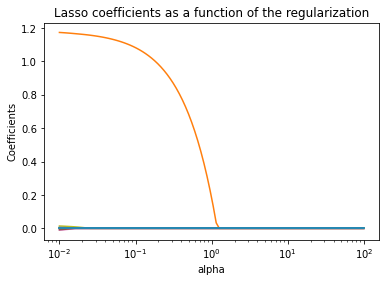

In [116]:
alphas = 10**np.linspace(-2,2,100)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a, max_iter=10000) # increase iterations for optimization of coefficients
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
# plt.legend(list(X_train.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [117]:
lassocv = LassoCV(alphas=alphas, max_iter=10000)
lassocv.fit(scale(X_train), y_train)

print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 0.01


In [118]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X_train.columns))

The coefficients are:
Number of Funding Rounds                        -0.000000
Total Equity Funding Amount Currency (in USD)    1.173946
Number of Investors                             -0.000000
Price Currency (in USD)                         -0.000000
Total Products Active                           -0.000000
                                                   ...   
Industry_other                                  -0.000000
Industry_semiconductor                           0.000000
Industry_software                                0.000000
Industry_web                                    -0.000000
Acquisition_Not Acquired                         0.000000
Length: 121, dtype: float64


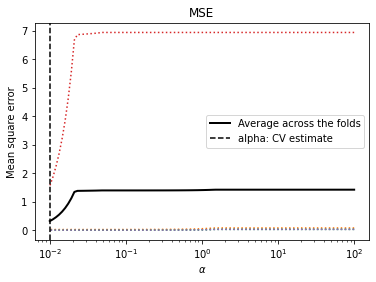

In [119]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, linestyle=":")
plt.plot(
    lassocv.alphas_,
    lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE")
plt.show()

In [120]:
lasso.set_params(alpha=lassocv.alpha_)
y_pred=lasso.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 0.923


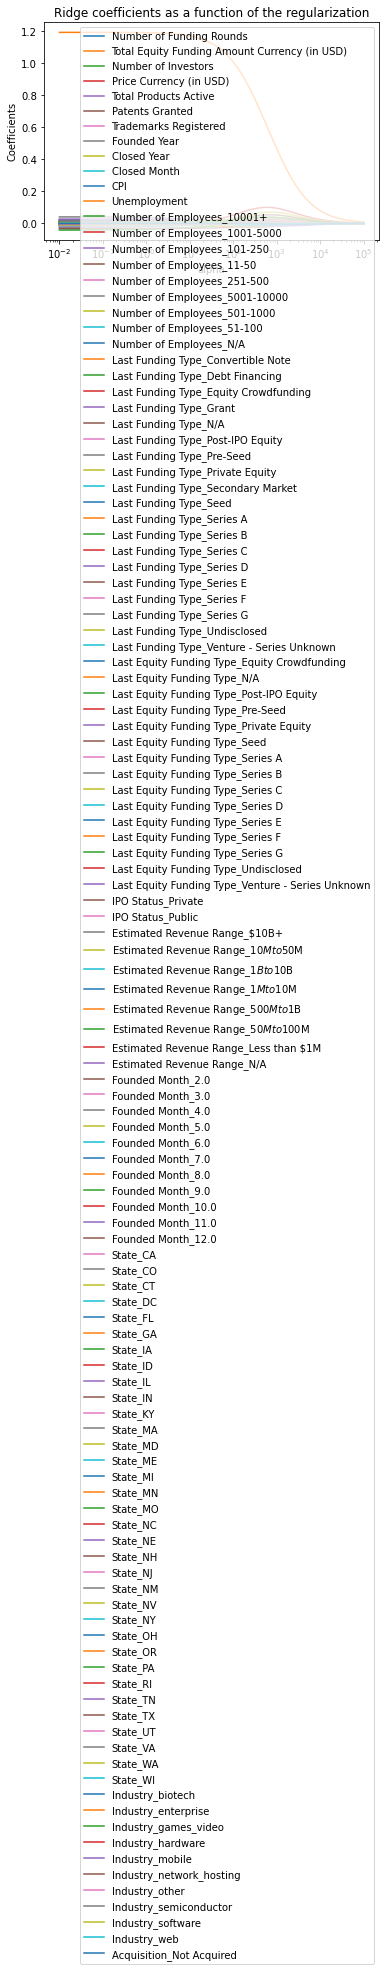

In [121]:
# ridge regression model
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X.columns), loc='best')

plt.title('Ridge coefficients as a function of the regularization');

In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

In [123]:
# set a large alpha to get smaller coefficients
ridge = Ridge(alpha=1000)
ridge.fit(scaler.transform(X_train), y_train)

print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
Number of Funding Rounds                         0.003063
Total Equity Funding Amount Currency (in USD)    0.465521
Number of Investors                              0.022936
Price Currency (in USD)                          0.095144
Total Products Active                           -0.007740
                                                   ...   
Industry_other                                  -0.005006
Industry_semiconductor                          -0.004573
Industry_software                               -0.000504
Industry_web                                    -0.004252
Acquisition_Not Acquired                        -0.004078
Length: 121, dtype: float64


In [124]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 0.01


In [125]:
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
Number of Funding Rounds                         0.001114
Total Equity Funding Amount Currency (in USD)    1.192815
Number of Investors                              0.003113
Price Currency (in USD)                         -0.011214
Total Products Active                           -0.002068
                                                   ...   
Industry_other                                  -0.001355
Industry_semiconductor                           0.001188
Industry_software                                0.004324
Industry_web                                     0.000341
Acquisition_Not Acquired                         0.001202
Length: 121, dtype: float64


In [126]:
y_pred=ridge.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 0.955


In [127]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

ENcv = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(scale(X_train), y_train)

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

The best alpha from ElasticNetCV: 0.0023655233980771117


In [128]:
# with the best alpha
EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(scale(X_train), y_train)
en_coefs = pd.Series(EN.coef_.flatten(), index=X_train.columns)

print('The coefficients are:')
print(en_coefs)


The coefficients are:
Number of Funding Rounds                        -0.000000
Total Equity Funding Amount Currency (in USD)    1.187422
Number of Investors                              0.000000
Price Currency (in USD)                         -0.005941
Total Products Active                           -0.001117
                                                   ...   
Industry_other                                  -0.000000
Industry_semiconductor                           0.000000
Industry_software                                0.003226
Industry_web                                     0.000000
Acquisition_Not Acquired                         0.000262
Length: 121, dtype: float64


In [129]:
y_pred=EN.predict(scale(X_test.values))
#best_model = y_pred
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 0.948


In [130]:
EN_array = pd.DataFrame(en_coefs)
pd.set_option('display.max_rows', None)

In [131]:
EN_array

0
Number of Funding Rounds                          -0.000000
Total Equity Funding Amount Currency (in USD)      1.187422
Number of Investors                                0.000000
Price Currency (in USD)                           -0.005941
Total Products Active                             -0.001117
Patents Granted                                    0.014403
Trademarks Registered                             -0.030899
Founded Year                                       0.005261
Closed Year                                       -0.000000
Closed Month                                      -0.000000
CPI                                                0.000239
Unemployment                                      -0.002471
Number of Employees_10001+                         0.000000
Number of Employees_1001-5000                     -0.000108
Number of Employees_101-250                        0.014292
Number of Employees_11-50                         -0.000000
Number of Employees_251-500                        0.000306
Number of Employees_5001-10000                     0.008735
Number of Employees_501-1000                      -0.002222
Number of Employees_51-100                        -0.000000
Number of Employees_N/A                            0.000000
Last Funding Type_Convertible Note                -0.000198
Last Funding Type_Debt Financing                   0.000665
Last Funding Type_Equity Crowdfunding             -0.000328
Last Funding Type_Grant                           -0.000102
Last Funding Type_N/A                              0.000000
Last Funding Type_Post-IPO Equity                 -0.000796
Last Funding Type_Pre-Seed                        -0.000000
Last Funding Type_Private Equity                   0.022360
Last Funding Type_Secondary Market                -0.002586
Last Funding Type_Seed                             0.000000
Last Funding Type_Series A                         0.000590
Last Funding Type_Series B                        -0.000000
Last Funding Type_Series C                        -0.000000
Last Funding Type_Series D                        -0.000000
Last Funding Type_Series E                        -0.000000
Last Funding Type_Series F                        -0.006167
Last Funding Type_Series G                        -0.004810
Last Funding Type_Undisclosed                     -0.000927
Last Funding Type_Venture - Series Unknown        -0.000000
Last Equity Funding Type_Equity Crowdfunding      -0.000239
Last Equity Funding Type_N/A                       0.000000
Last Equity Funding Type_Post-IPO Equity          -0.000192
Last Equity Funding Type_Pre-Seed                 -0.000000
Last Equity Funding Type_Private Equity            0.000147
Last Equity Funding Type_Seed                      0.001117
Last Equity Funding Type_Series A                  0.000000
Last Equity Funding Type_Series B                  0.003465
Last Equity Funding Type_Series C                 -0.000000
Last Equity Funding Type_Series D                 -0.001629
Last Equity Funding Type_Series E                 -0.000438
Last Equity Funding Type_Series F                  0.000000
Last Equity Funding Type_Series G                 -0.000095
Last Equity Funding Type_Undisclosed              -0.000042
Last Equity Funding Type_Venture - Series Unknown -0.000392
IPO Status_Private                                -0.027216
IPO Status_Public                                  0.000000
Estimated Revenue Range_$10B+                      0.000859
Estimated Revenue Range_$10M to $50M              -0.000000
Estimated Revenue Range_$1B to $10B                0.003666
Estimated Revenue Range_$1M to $10M                0.004948
Estimated Revenue Range_$500M to $1B              -0.004204
Estimated Revenue Range_$50M to $100M              0.000000
Estimated Revenue Range_Less than $1M             -0.000000
Estimated Revenue Range_N/A                        0.005313
Founded Month_2.0                                  0.000000
Founded Month_3.0                     

In [132]:
len(EN_array)

121

### Linear Regression - For Acquired Companies Only

In [133]:
value_counts = merged_df_test['Acquisition'].value_counts()
print(merged_df_test['Acquisition'].value_counts())

Acquired        676
Not Acquired    379
Name: Acquisition, dtype: int64


In [134]:
#Subsetting the data to only include companies that were acquired AND have a price that is greater than 0
df_acquired = merged_df_test[merged_df_test["Acquisition"] == "Acquired"]
df_price = df_acquired[df_acquired["Price Currency (in USD)"] > 0]

In [135]:
# Define X and y
X1 = df_price.drop(columns=['Price Currency (in USD)'])
y1 = df_price['Price Currency (in USD)']

for col in X1.select_dtypes(include='object').columns:
    X1[col] = X1[col].astype('category')
X1 = pd.get_dummies(data=X1, drop_first=True)

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=200)

In [136]:
# Create LinearRegression object and fit to training data
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predict y values for test data
y_pred = linear_regressor.predict(X_test)

# Display coefficients
coefficients = pd.Series(linear_regressor.coef_.flatten(), index=X_train.columns)
print("Coefficients:")
print(coefficients)

# Calculate training and test MSE
mse_train = mean_squared_error(y_train, linear_regressor.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Training MSE:", mse_train)
print("Test MSE:", mse_test)
print("MSE:", round(mean_squared_error(y_test, y_pred), 3))

Coefficients:
Number of Funding Rounds                            -6.282463e-01
Total Equity Funding Amount Currency (in USD)       -2.108959e+00
Total Funding Amount Currency (in USD)               6.483919e+00
Number of Investors                                  6.109562e-02
Total Products Active                                8.071414e-03
Patents Granted                                     -5.712632e-02
Trademarks Registered                                1.605778e-01
Founded Year                                         1.816336e-03
Closed Year                                          2.409577e-04
Closed Month                                        -3.774338e-01
CPI                                                 -3.123141e-01
Unemployment                                         4.750371e-01
Number of Employees_10001+                           4.544730e+00
Number of Employees_1001-5000                        8.367669e+00
Number of Employees_101-250                          2.107166e

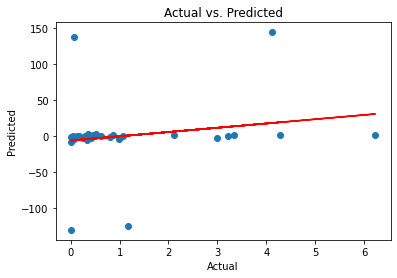

In [137]:
plt.scatter(y_test, y_pred)
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [138]:
k_value = [k for k in range(2, 10)]
MSE_train = []
MSE_test = []

x_train_extend = X_train
x_test_extend = X_test
    
for k in k_value:
    
    # Add x^k into the training and test data
    x_train_extend = np.concatenate((x_train_extend, X_train**k), axis=1)
    x_test_extend = np.concatenate((x_test_extend, X_test**k), axis=1)

    # Train the model using the training sets
    linear_regressor.fit(x_train_extend,y_train)

    # Record training MSE
    MSE_train.append(mean_squared_error(y_train, linear_regressor.predict(x_train_extend)))

    # Record test MSE
    MSE_test.append(mean_squared_error(y_test, linear_regressor.predict(x_test_extend)))

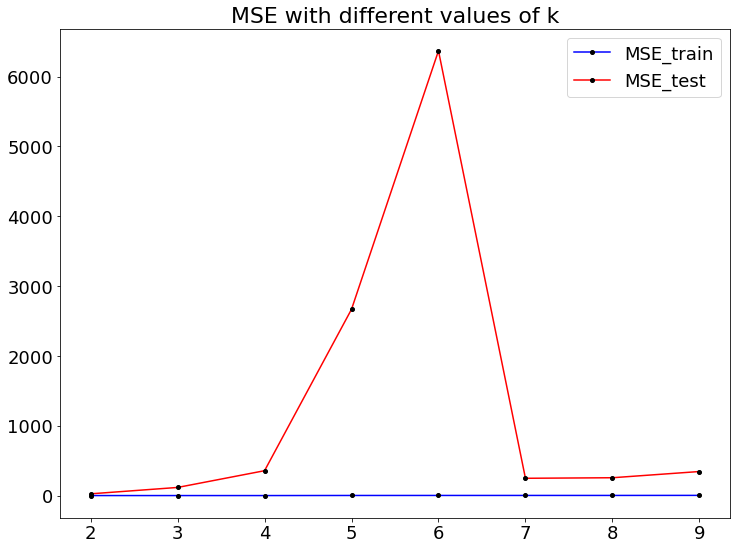

In [139]:
import matplotlib.pyplot as plt
# plot the train and test MSE values for various orders of K
# select model with minimum test MSE
fig, ax1 = plt.subplots(figsize=(12, 9))
plt.plot(k_value, MSE_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'MSE_train')
plt.plot(k_value, MSE_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'MSE_test')
plt.legend(fontsize=18)
plt.title('MSE with different values of k', fontsize=22)
plt.tick_params(labelsize=18)
plt.show()

In [140]:
MSE_test

[24.864087430472612,
 116.19868257792383,
 356.0625573143482,
 2667.9450042119006,
 6369.8434109012,
 247.4261623771244,
 255.26853107483294,
 344.2392877651073]

#### Model Evaluation

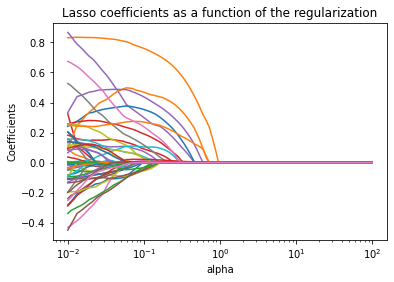

In [141]:
alphas = 10**np.linspace(-2,2,100)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a, max_iter=10000) # increase iterations for optimization of coefficients
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
# plt.legend(list(X_train.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [142]:
lassocv = LassoCV(alphas=alphas, max_iter=10000)
lassocv.fit(scale(X_train), y_train)

print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 0.05857020818056667


In [143]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X_train.columns))

The coefficients are:
Number of Funding Rounds                            -0.089925
Total Equity Funding Amount Currency (in USD)        0.804784
Total Funding Amount Currency (in USD)               0.000000
Number of Investors                                  0.135621
Total Products Active                                0.387561
Patents Granted                                     -0.000000
Trademarks Registered                                0.000000
Founded Year                                         0.000000
Closed Year                                         -0.088807
Closed Month                                        -0.000000
CPI                                                 -0.000000
Unemployment                                         0.000000
Number of Employees_10001+                          -0.000000
Number of Employees_1001-5000                        0.000000
Number of Employees_101-250                          0.109402
Number of Employees_11-50                       

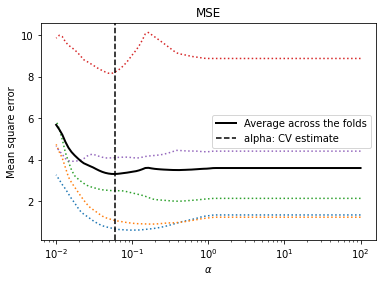

In [144]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, linestyle=":")
plt.plot(
    lassocv.alphas_,
    lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE")
plt.show()

In [145]:
lasso.set_params(alpha=lassocv.alpha_)
y_pred=lasso.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 2.875


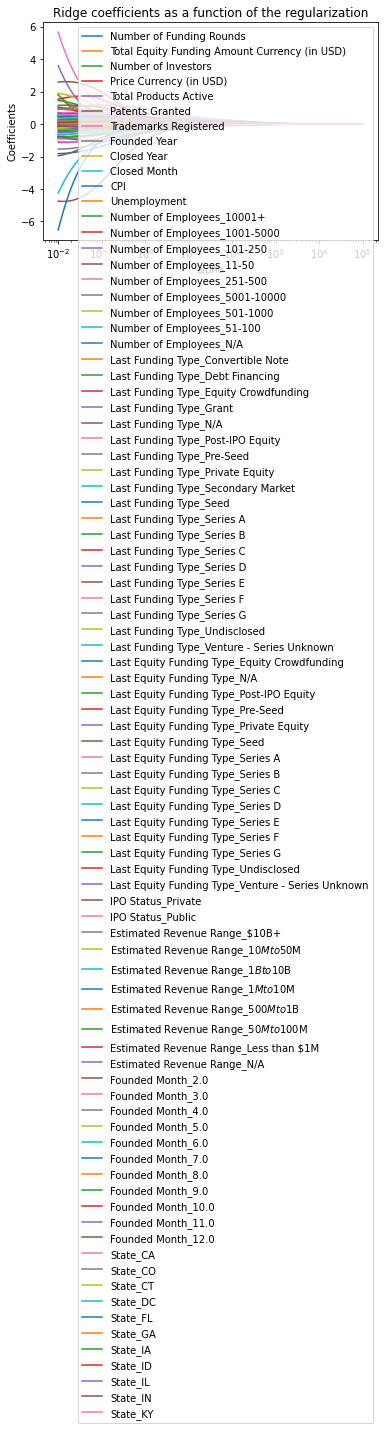

In [146]:
# ridge regression model
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X.columns), loc='best')

plt.title('Ridge coefficients as a function of the regularization');

In [147]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

In [148]:
# set a large alpha to get smaller coefficients
ridge = Ridge(alpha=1000)
ridge.fit(scaler.transform(X_train), y_train)

print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
Number of Funding Rounds                            -0.003685
Total Equity Funding Amount Currency (in USD)        0.058473
Total Funding Amount Currency (in USD)               0.057783
Number of Investors                                  0.022248
Total Products Active                                0.031315
Patents Granted                                     -0.003367
Trademarks Registered                                0.033235
Founded Year                                         0.004238
Closed Year                                         -0.016218
Closed Month                                        -0.007417
CPI                                                 -0.000858
Unemployment                                        -0.002561
Number of Employees_10001+                          -0.007117
Number of Employees_1001-5000                        0.025918
Number of Employees_101-250                          0.012679
Number of Employees_11-50                       

In [149]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 126.1856883066021


In [150]:
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
Number of Funding Rounds                            -0.053750
Total Equity Funding Amount Currency (in USD)        0.199715
Total Funding Amount Currency (in USD)               0.196236
Number of Investors                                  0.073194
Total Products Active                                0.137511
Patents Granted                                     -0.044984
Trademarks Registered                                0.087638
Founded Year                                         0.014652
Closed Year                                         -0.057863
Closed Month                                        -0.024632
CPI                                                 -0.016127
Unemployment                                        -0.006094
Number of Employees_10001+                          -0.026642
Number of Employees_1001-5000                        0.072875
Number of Employees_101-250                          0.070748
Number of Employees_11-50                       

In [151]:
y_pred=ridge.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 2.406


In [152]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

ENcv = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(scale(X_train), y_train)

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

The best alpha from ElasticNetCV: 0.13532197256202563


In [153]:
# with the best alpha
EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(scale(X_train), y_train)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X_train.columns))

The coefficients are:
Number of Funding Rounds                            -0.057446
Total Equity Funding Amount Currency (in USD)        0.404716
Total Funding Amount Currency (in USD)               0.314231
Number of Investors                                  0.121308
Total Products Active                                0.331908
Patents Granted                                     -0.000000
Trademarks Registered                                0.035525
Founded Year                                         0.000000
Closed Year                                         -0.081137
Closed Month                                        -0.000000
CPI                                                 -0.000000
Unemployment                                         0.000000
Number of Employees_10001+                          -0.000000
Number of Employees_1001-5000                        0.000000
Number of Employees_101-250                          0.101256
Number of Employees_11-50                       

In [154]:
y_pred=EN.predict(scale(X_test.values))
#best_model = y_pred
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 2.704


# Expected Value Framework

Expected Benefit = (Probability of Acquisition)*(Predicted Selling Price - Predicted Total Funding) + (1 - Probability of Acquisition)*(Predicted Total Funding)

If the expected benefit is above 0, then venture capitalists should invest.

In [155]:
# Obtain Classifier Predicted values for the test data
# Random Forest
# Preprocess the data

encoder = LabelEncoder()
Yrf = encoder.fit_transform(merged_df_test['Acquisition'])
Xrf = merged_df_test.drop(['Acquisition'], axis=1)

for col in Xrf.select_dtypes(include='object').columns:
    Xrf[col] = Xrf[col].astype('category')

Xrf = pd.get_dummies(data=Xrf, drop_first=True)

In [156]:
#obtain predicted values for RF
y_pred_rf_total=best_rd.predict(Xrf)

/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [157]:
#obtain predicted probabilities for RF for Acquisition
y_prob_rf = best_rd.predict_proba(Xrf)
print('Predicted probabilities:', y_prob_rf)

Predicted probabilities: [[0.39420414 0.60579586]
 [0.4997774  0.5002226 ]
 [0.43329683 0.56670317]
 ...
 [0.4044684  0.5955316 ]
 [0.39056662 0.60943338]
 [0.43954789 0.56045211]]


/Users/stephaniepalanca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [158]:
ev_df = merged_df_test

In [159]:
# Use this to add pred acquisition and prob to data
ev_df['Y_Pred_Acquisition'] = y_pred_rf_total
ev_df['Prob_Acquisition'] = y_prob_rf[:,0]


In [160]:
ev_df

Number of Employees  Number of Funding Rounds         Last Funding Type  \
0                  11-50                       2.0                  Series A   
1               501-1000                       9.0            Private Equity   
2               501-1000                      10.0                  Series F   
3                 51-100                       9.0       Equity Crowdfunding   
4                101-250                       9.0                  Series B   
5              1001-5000                       2.0  Venture - Series Unknown   
6                  11-50                       3.0                  Series A   
7                 51-100                       3.0                  Series B   
8                101-250                       3.0  Venture - Series Unknown   
9                   1-10                       1.0                      Seed   
10                  1-10                       1.0                  Pre-Seed   
11            5001-10000                       1.0                  Series A   
12                 11-50                       5.0  Venture - Series Unknown   
13                  1-10                       3.0                      Seed   
14                 11-50                       3.0                  Series B   
15                  1-10                       2.0                      Seed   
16                  1-10                       1.0                      Seed   
17                51-100                       6.0                  Series C   
18                 11-50                       5.0  Venture - Series Unknown   
19                 11-50                       3.0                      Seed   
20                 11-50                       3.0                  Pre-Seed   
21                51-100                       3.0                  Series A   
22                51-100                       5.0  Venture - Series Unknown   
23                 11-50                       4.0          Secondary Market   
24                 11-50                       1.0                  Series A   
25                51-100                       6.0                      Seed   
26            5001-10000                       3.0            Debt Financing   
27                51-100                       4.0                  Series C   
28                  1-10                       1.0                      Seed   
29                  1-10                       2.0                      Seed   
30                 11-50                       8.0            Private Equity   
31                51-100                       4.0                     Grant   
32                 11-50                       5.0  Venture - Series Unknown   
33                51-100                       3.0  Venture - Series Unknown   
34                 11-50                       7.0                  Series C   
35                  1-10                       2.0                  Pre-Seed   
36             1001-5000                       6.0                  Series C   
37                  1-10                       1.0            Debt Financing   
38                 11-50                       6.0  Venture - Series Unknown   
39               251-500                       3.0                  Series B   
40                 11-50                       2.0  Venture - Series Unknown   
41                  1-10                       1.0                  Pre-Seed   
42                 11-50                       1.0                  Pre-Seed   
43             1001-5000                       7.0           Post-IPO Equity   
44                 11-50                       3.0                  Series A   
45                10001+                       5.0                  Series E   
46                  1-10                       2.0                      Seed   
47               101-250                       3.0                  Series B   
48                 11-50                       3.0               Undisclosed   
49   

In [161]:
# obtain regression predicted values for funding -- regular MLR
# Define X and y
X_mlr = merged_df_test.drop(columns=['Total Funding Amount Currency (in USD)'], axis=1)
y_mlr = merged_df_test['Total Funding Amount Currency (in USD)']

for col in X_mlr.select_dtypes(include='object').columns:
    X_mlr[col] = X_mlr[col].astype('category')
X_mlr = pd.get_dummies(data=X_mlr, drop_first=True)

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_mlr, y_mlr, test_size=0.3, random_state=200)


# Create LinearRegression object and fit to training data
linear_regressor_ev = LinearRegression()
linear_regressor_ev.fit(X_train, y_train)

# Predict y values for test data
y_pred_fund = linear_regressor_ev.predict(X_mlr)

In [162]:
ev_df['Y_Pred_Funding'] = y_pred_fund

In [163]:
ev_df

Number of Employees  Number of Funding Rounds         Last Funding Type  \
0                  11-50                       2.0                  Series A   
1               501-1000                       9.0            Private Equity   
2               501-1000                      10.0                  Series F   
3                 51-100                       9.0       Equity Crowdfunding   
4                101-250                       9.0                  Series B   
5              1001-5000                       2.0  Venture - Series Unknown   
6                  11-50                       3.0                  Series A   
7                 51-100                       3.0                  Series B   
8                101-250                       3.0  Venture - Series Unknown   
9                   1-10                       1.0                      Seed   
10                  1-10                       1.0                  Pre-Seed   
11            5001-10000                       1.0                  Series A   
12                 11-50                       5.0  Venture - Series Unknown   
13                  1-10                       3.0                      Seed   
14                 11-50                       3.0                  Series B   
15                  1-10                       2.0                      Seed   
16                  1-10                       1.0                      Seed   
17                51-100                       6.0                  Series C   
18                 11-50                       5.0  Venture - Series Unknown   
19                 11-50                       3.0                      Seed   
20                 11-50                       3.0                  Pre-Seed   
21                51-100                       3.0                  Series A   
22                51-100                       5.0  Venture - Series Unknown   
23                 11-50                       4.0          Secondary Market   
24                 11-50                       1.0                  Series A   
25                51-100                       6.0                      Seed   
26            5001-10000                       3.0            Debt Financing   
27                51-100                       4.0                  Series C   
28                  1-10                       1.0                      Seed   
29                  1-10                       2.0                      Seed   
30                 11-50                       8.0            Private Equity   
31                51-100                       4.0                     Grant   
32                 11-50                       5.0  Venture - Series Unknown   
33                51-100                       3.0  Venture - Series Unknown   
34                 11-50                       7.0                  Series C   
35                  1-10                       2.0                  Pre-Seed   
36             1001-5000                       6.0                  Series C   
37                  1-10                       1.0            Debt Financing   
38                 11-50                       6.0  Venture - Series Unknown   
39               251-500                       3.0                  Series B   
40                 11-50                       2.0  Venture - Series Unknown   
41                  1-10                       1.0                  Pre-Seed   
42                 11-50                       1.0                  Pre-Seed   
43             1001-5000                       7.0           Post-IPO Equity   
44                 11-50                       3.0                  Series A   
45                10001+                       5.0                  Series E   
46                  1-10                       2.0                      Seed   
47               101-250                       3.0                  Series B   
48                 11-50                       3.0               Undisclosed   
49   

In [164]:
ev_subset = ev_df[ev_df['Acquisition'] == 'Not Acquired']
ev_subset

Number of Employees  Number of Funding Rounds         Last Funding Type  \
0                  11-50                       2.0                  Series A   
3                 51-100                       9.0       Equity Crowdfunding   
4                101-250                       9.0                  Series B   
6                  11-50                       3.0                  Series A   
8                101-250                       3.0  Venture - Series Unknown   
9                   1-10                       1.0                      Seed   
10                  1-10                       1.0                  Pre-Seed   
12                 11-50                       5.0  Venture - Series Unknown   
13                  1-10                       3.0                      Seed   
14                 11-50                       3.0                  Series B   
15                  1-10                       2.0                      Seed   
16                  1-10                       1.0                      Seed   
19                 11-50                       3.0                      Seed   
20                 11-50                       3.0                  Pre-Seed   
24                 11-50                       1.0                  Series A   
25                51-100                       6.0                      Seed   
28                  1-10                       1.0                      Seed   
29                  1-10                       2.0                      Seed   
33                51-100                       3.0  Venture - Series Unknown   
35                  1-10                       2.0                  Pre-Seed   
37                  1-10                       1.0            Debt Financing   
41                  1-10                       1.0                  Pre-Seed   
42                 11-50                       1.0                  Pre-Seed   
44                 11-50                       3.0                  Series A   
46                  1-10                       2.0                      Seed   
48                 11-50                       3.0               Undisclosed   
49                  1-10                       1.0                  Pre-Seed   
62                 11-50                       5.0  Venture - Series Unknown   
70                   N/A                       1.0                  Pre-Seed   
71                  1-10                       2.0                  Pre-Seed   
79                  1-10                       1.0                  Pre-Seed   
106                11-50                       2.0                  Pre-Seed   
119                 1-10                       2.0          Convertible Note   
128               51-100                       2.0                  Series C   
140                11-50                       3.0  Venture - Series Unknown   
148                 1-10                       1.0                  Series A   
182               51-100                       8.0            Private Equity   
193                11-50                       5.0            Debt Financing   
213                11-50                       4.0                  Series D   
219              251-500                       0.0                       N/A   
240                  N/A                       4.0  Venture - Series Unknown   
247                11-50                       2.0                  Pre-Seed   
248              251-500                       3.0                  Series C   
250               51-100                       5.0            Debt Financing   
251                 1-10                       9.0            Debt Financing   
260                11-50                       6.0  Venture - Series Unknown   
268                11-50                       3.0  Venture - Series Unknown   
272              251-500                       4.0            Private Equity   
276               51-100                       4.0  Venture - Series Unknown   
280  

In [165]:
print(ev_subset['Y_Pred_Acquisition'].value_counts())

1    327
0     52
Name: Y_Pred_Acquisition, dtype: int64


In [166]:
#Obtain predicted values for price (for those that were acquired AND have price information)
df_acquired = merged_df_test[merged_df_test["Acquisition"] == "Acquired"]
df_price = df_acquired[df_acquired["Price Currency (in USD)"] > 0]

X1 = df_price.drop(columns=['Price Currency (in USD)'])
y1 = df_price['Price Currency (in USD)']

for col in X1.select_dtypes(include='object').columns:
    X1[col] = X1[col].astype('category')
X1 = pd.get_dummies(data=X1, drop_first=True)

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=200)

In [167]:
ridge = Ridge()
ridge.fit(X_train, y_train)

y_pred_price = ridge.predict(X1)

In [168]:
df_price

Number of Employees  Number of Funding Rounds         Last Funding Type  \
1               501-1000                       9.0            Private Equity   
5              1001-5000                       2.0  Venture - Series Unknown   
27                51-100                       4.0                  Series C   
31                51-100                       4.0                     Grant   
36             1001-5000                       6.0                  Series C   
39               251-500                       3.0                  Series B   
43             1001-5000                       7.0           Post-IPO Equity   
45                10001+                       5.0                  Series E   
51               251-500                       6.0                  Series G   
52               251-500                       2.0                  Series B   
54               101-250                       4.0                  Series B   
56                51-100                       6.0                  Series E   
57              501-1000                       7.0                  Series D   
58               251-500                       6.0            Debt Financing   
60               251-500                       2.0  Venture - Series Unknown   
67               101-250                       4.0                  Series B   
80                51-100                       2.0                  Series B   
83               101-250                       3.0  Venture - Series Unknown   
84                 11-50                       2.0                  Series B   
87                  1-10                       3.0                      Seed   
91               251-500                       6.0                  Series B   
96                 11-50                       3.0                      Seed   
99                 11-50                       2.0                  Series B   
103               51-100                       4.0  Venture - Series Unknown   
107              101-250                       5.0          Secondary Market   
110              101-250                       3.0                  Series A   
111               51-100                       5.0                  Series D   
112             501-1000                       3.0                  Series A   
113             501-1000                       8.0  Venture - Series Unknown   
117                 1-10                       2.0                  Series A   
120                11-50                       2.0                  Series B   
121               51-100                       6.0                  Series G   
131               51-100                       6.0                  Series D   
143               51-100                       3.0                  Series C   
144              101-250                       2.0                  Series B   
145               51-100                       4.0                  Series D   
149                11-50                       2.0            Private Equity   
150              101-250                       1.0                  Series A   
151              101-250                       3.0                  Series B   
157              101-250                       4.0                  Series D   
159               51-100                       5.0                  Series C   
160                11-50                       5.0            Debt Financing   
161            1001-5000                       2.0                  Series A   
163               51-100                       3.0            Private Equity   
170                11-50                       6.0  Venture - Series Unknown   
171            1001-5000                      16.0                  Series C   
173                11-50                       2.0                  Series C   
174               51-100                       2.0                  Series B   
176                 1-10                       3.0                  Series A   
184  

In [169]:
#df_price_2 = df_price 
df_price_2 = pd.DataFrame(df_price)
df_price_2['Y_Pred_Price'] = y_pred_price

In [170]:
len(df_price_2)

111

In [171]:
df_price_2

Number of Employees  Number of Funding Rounds         Last Funding Type  \
1               501-1000                       9.0            Private Equity   
5              1001-5000                       2.0  Venture - Series Unknown   
27                51-100                       4.0                  Series C   
31                51-100                       4.0                     Grant   
36             1001-5000                       6.0                  Series C   
39               251-500                       3.0                  Series B   
43             1001-5000                       7.0           Post-IPO Equity   
45                10001+                       5.0                  Series E   
51               251-500                       6.0                  Series G   
52               251-500                       2.0                  Series B   
54               101-250                       4.0                  Series B   
56                51-100                       6.0                  Series E   
57              501-1000                       7.0                  Series D   
58               251-500                       6.0            Debt Financing   
60               251-500                       2.0  Venture - Series Unknown   
67               101-250                       4.0                  Series B   
80                51-100                       2.0                  Series B   
83               101-250                       3.0  Venture - Series Unknown   
84                 11-50                       2.0                  Series B   
87                  1-10                       3.0                      Seed   
91               251-500                       6.0                  Series B   
96                 11-50                       3.0                      Seed   
99                 11-50                       2.0                  Series B   
103               51-100                       4.0  Venture - Series Unknown   
107              101-250                       5.0          Secondary Market   
110              101-250                       3.0                  Series A   
111               51-100                       5.0                  Series D   
112             501-1000                       3.0                  Series A   
113             501-1000                       8.0  Venture - Series Unknown   
117                 1-10                       2.0                  Series A   
120                11-50                       2.0                  Series B   
121               51-100                       6.0                  Series G   
131               51-100                       6.0                  Series D   
143               51-100                       3.0                  Series C   
144              101-250                       2.0                  Series B   
145               51-100                       4.0                  Series D   
149                11-50                       2.0            Private Equity   
150              101-250                       1.0                  Series A   
151              101-250                       3.0                  Series B   
157              101-250                       4.0                  Series D   
159               51-100                       5.0                  Series C   
160                11-50                       5.0            Debt Financing   
161            1001-5000                       2.0                  Series A   
163               51-100                       3.0            Private Equity   
170                11-50                       6.0  Venture - Series Unknown   
171            1001-5000                      16.0                  Series C   
173                11-50                       2.0                  Series C   
174               51-100                       2.0                  Series B   
176                 1-10                       3.0                  Series A   
184  

In [172]:
#Expected Value 
df_price_2['Expected_Value_1'] = df_price_2['Prob_Acquisition']*(df_price_2['Y_Pred_Price'] - df_price_2['Y_Pred_Funding'])

In [173]:
df_price_2['Expected_Value_2'] = (1-df_price_2['Prob_Acquisition'])*-df_price_2['Y_Pred_Funding']

In [174]:
df_price_2['Expected_Benefit'] = df_price_2['Expected_Value_1'] + df_price_2['Expected_Value_2']

In [175]:
df_price_2 = df_price_2.drop(columns = ['Expected_Value_1', 'Expected_Value_2'])

In [176]:
df_price_2.head()

Number of Employees  Number of Funding Rounds         Last Funding Type  \
1             501-1000                       9.0            Private Equity   
5            1001-5000                       2.0  Venture - Series Unknown   
27              51-100                       4.0                  Series C   
31              51-100                       4.0                     Grant   
36           1001-5000                       6.0                  Series C   

    Last Equity Funding Type  Total Equity Funding Amount Currency (in USD)  \
1             Private Equity                                       0.680874   
5   Venture - Series Unknown                                      -0.133729   
27                  Series C                                      -0.054896   
31                  Series C                                       0.202141   
36                  Series C                                      -0.029996   

    Total Funding Amount Currency (in USD)  Number of Investors  \
1                                 1.693347                 11.0   
5                                -0.128378                  2.0   
27                               -0.060249                  6.0   
31                                0.162123                  8.0   
36                               -0.038729                  5.0   

    Price Currency (in USD) IPO Status  Total Products Active  ...  State  \
1                  1.275339    Private                   36.0  ...     CA   
5                  6.874782    Private                   20.0  ...     CA   
27                 0.004696    Private                   70.0  ...     CA   
31                 5.367239    Private                   18.0  ...     CA   
36                 0.413886    Private                   39.0  ...     TX   

       Industry  CPI  Unemployment Acquisition  Y_Pred_Acquisition  \
1         other  5.3           6.1    Acquired                   1   
5   games_video  3.1           5.4    Acquired                   1   
27  games_video  4.0           4.7    Acquired                   0   
31        other  2.1           4.6    Acquired                   0   
36        other  2.1           4.6    Acquired                   1   

    Prob_Acquisition Y_Pred_Funding Y_Pred_Price  Expected_Benefit  
1           0.499777       0.943309     1.024132         -0.431471  
5           0.458057      -0.128378     5.623133          2.704091  
27          0.559932      -0.058210     5.019167          2.868602  
31          0.536169       0.068977     4.192366          2.178839  
36          0.490350      -0.084815     1.963013          1.047379  

[5 rows x 27 columns]

In [177]:
df_price_2['Investment_Decision'] = df_price_2.apply(lambda row: 'Invest' if row['Expected_Benefit'] > 0 else 'Do Not Invest', axis=1)

In [178]:
df_price_2

Number of Employees  Number of Funding Rounds         Last Funding Type  \
1               501-1000                       9.0            Private Equity   
5              1001-5000                       2.0  Venture - Series Unknown   
27                51-100                       4.0                  Series C   
31                51-100                       4.0                     Grant   
36             1001-5000                       6.0                  Series C   
39               251-500                       3.0                  Series B   
43             1001-5000                       7.0           Post-IPO Equity   
45                10001+                       5.0                  Series E   
51               251-500                       6.0                  Series G   
52               251-500                       2.0                  Series B   
54               101-250                       4.0                  Series B   
56                51-100                       6.0                  Series E   
57              501-1000                       7.0                  Series D   
58               251-500                       6.0            Debt Financing   
60               251-500                       2.0  Venture - Series Unknown   
67               101-250                       4.0                  Series B   
80                51-100                       2.0                  Series B   
83               101-250                       3.0  Venture - Series Unknown   
84                 11-50                       2.0                  Series B   
87                  1-10                       3.0                      Seed   
91               251-500                       6.0                  Series B   
96                 11-50                       3.0                      Seed   
99                 11-50                       2.0                  Series B   
103               51-100                       4.0  Venture - Series Unknown   
107              101-250                       5.0          Secondary Market   
110              101-250                       3.0                  Series A   
111               51-100                       5.0                  Series D   
112             501-1000                       3.0                  Series A   
113             501-1000                       8.0  Venture - Series Unknown   
117                 1-10                       2.0                  Series A   
120                11-50                       2.0                  Series B   
121               51-100                       6.0                  Series G   
131               51-100                       6.0                  Series D   
143               51-100                       3.0                  Series C   
144              101-250                       2.0                  Series B   
145               51-100                       4.0                  Series D   
149                11-50                       2.0            Private Equity   
150              101-250                       1.0                  Series A   
151              101-250                       3.0                  Series B   
157              101-250                       4.0                  Series D   
159               51-100                       5.0                  Series C   
160                11-50                       5.0            Debt Financing   
161            1001-5000                       2.0                  Series A   
163               51-100                       3.0            Private Equity   
170                11-50                       6.0  Venture - Series Unknown   
171            1001-5000                      16.0                  Series C   
173                11-50                       2.0                  Series C   
174               51-100                       2.0                  Series B   
176                 1-10                       3.0                  Series A   
184  

In [179]:
print(df_price_2['Investment_Decision'].value_counts())

Invest           100
Do Not Invest     11
Name: Investment_Decision, dtype: int64


NOTE: 
Of the ones that are acquired (that we have price information for), we are only recommending that you invest in 91 of these. Just because a company was acquired, that does not mean it should be invested in. If given pricing information, we can build a larger dataset and a more accurate model.

#### Exporatory Data Analysis with the Probability of Acquisition, Predicted Returns, Predicted Funding Amount, and Expected Benefit

In [180]:
df_price_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 1 to 1039
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Number of Employees                            111 non-null    object 
 1   Number of Funding Rounds                       111 non-null    float64
 2   Last Funding Type                              111 non-null    object 
 3   Last Equity Funding Type                       111 non-null    object 
 4   Total Equity Funding Amount Currency (in USD)  111 non-null    float64
 5   Total Funding Amount Currency (in USD)         111 non-null    float64
 6   Number of Investors                            111 non-null    float64
 7   Price Currency (in USD)                        111 non-null    float64
 8   IPO Status                                     111 non-null    object 
 9   Total Products Active                          111 no

In [181]:
df_invest = df_price_2[df_price_2['Investment_Decision'] == 'Invest']

Text(0, 0.5, 'Counts')

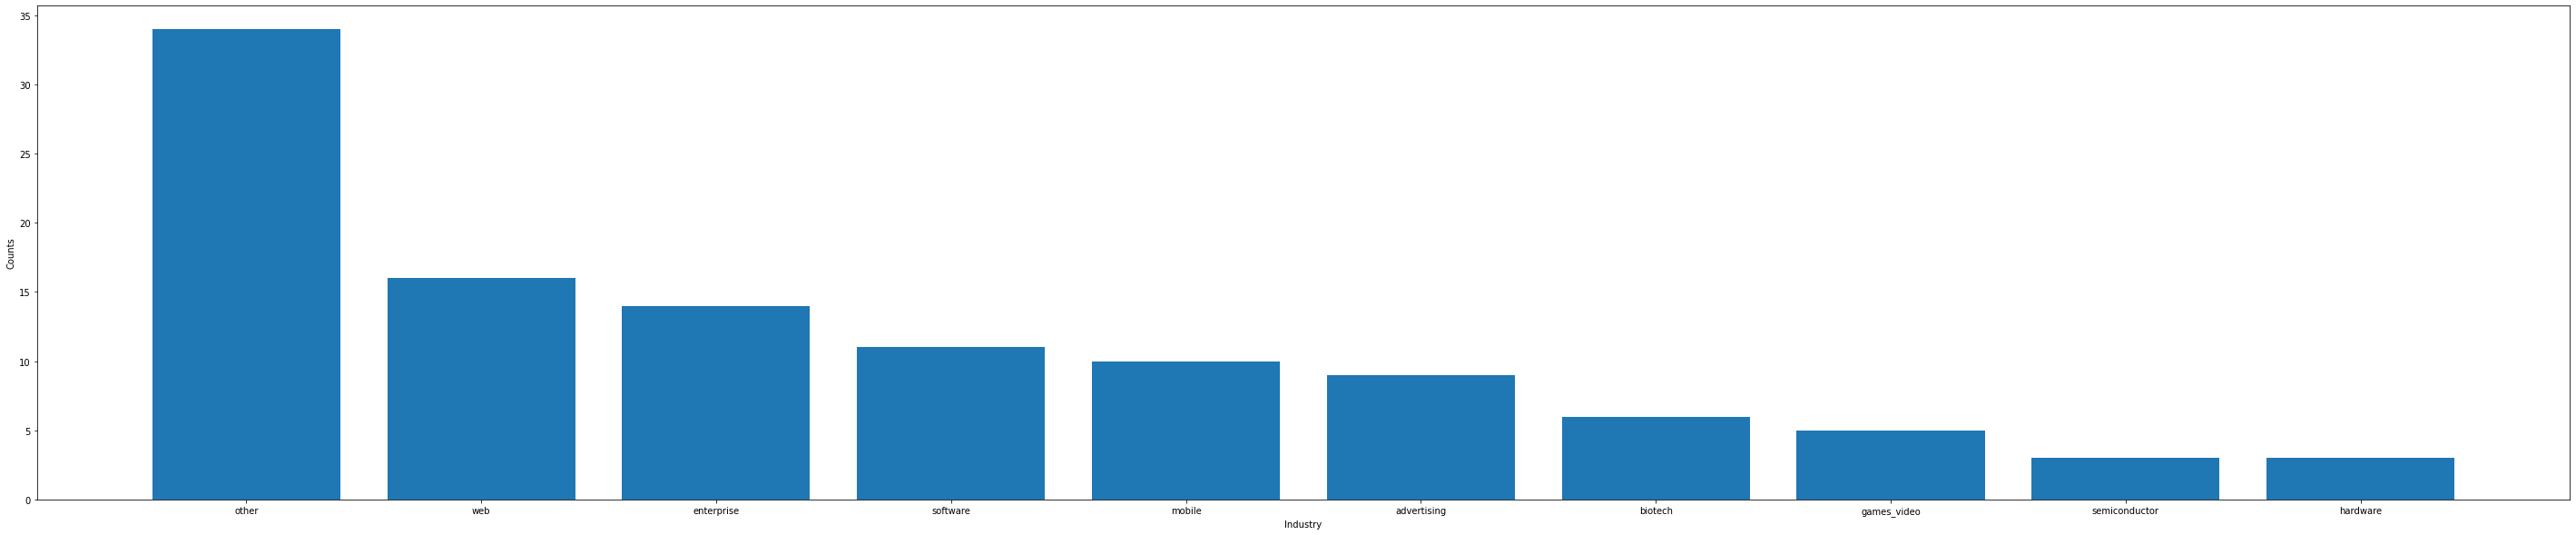

In [182]:
industry = df_price_2['Industry'].value_counts()
fig, ax = plt.subplots(figsize=(50, 10))
plt.bar(industry.index, industry.values)
plt.xlabel("Industry")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

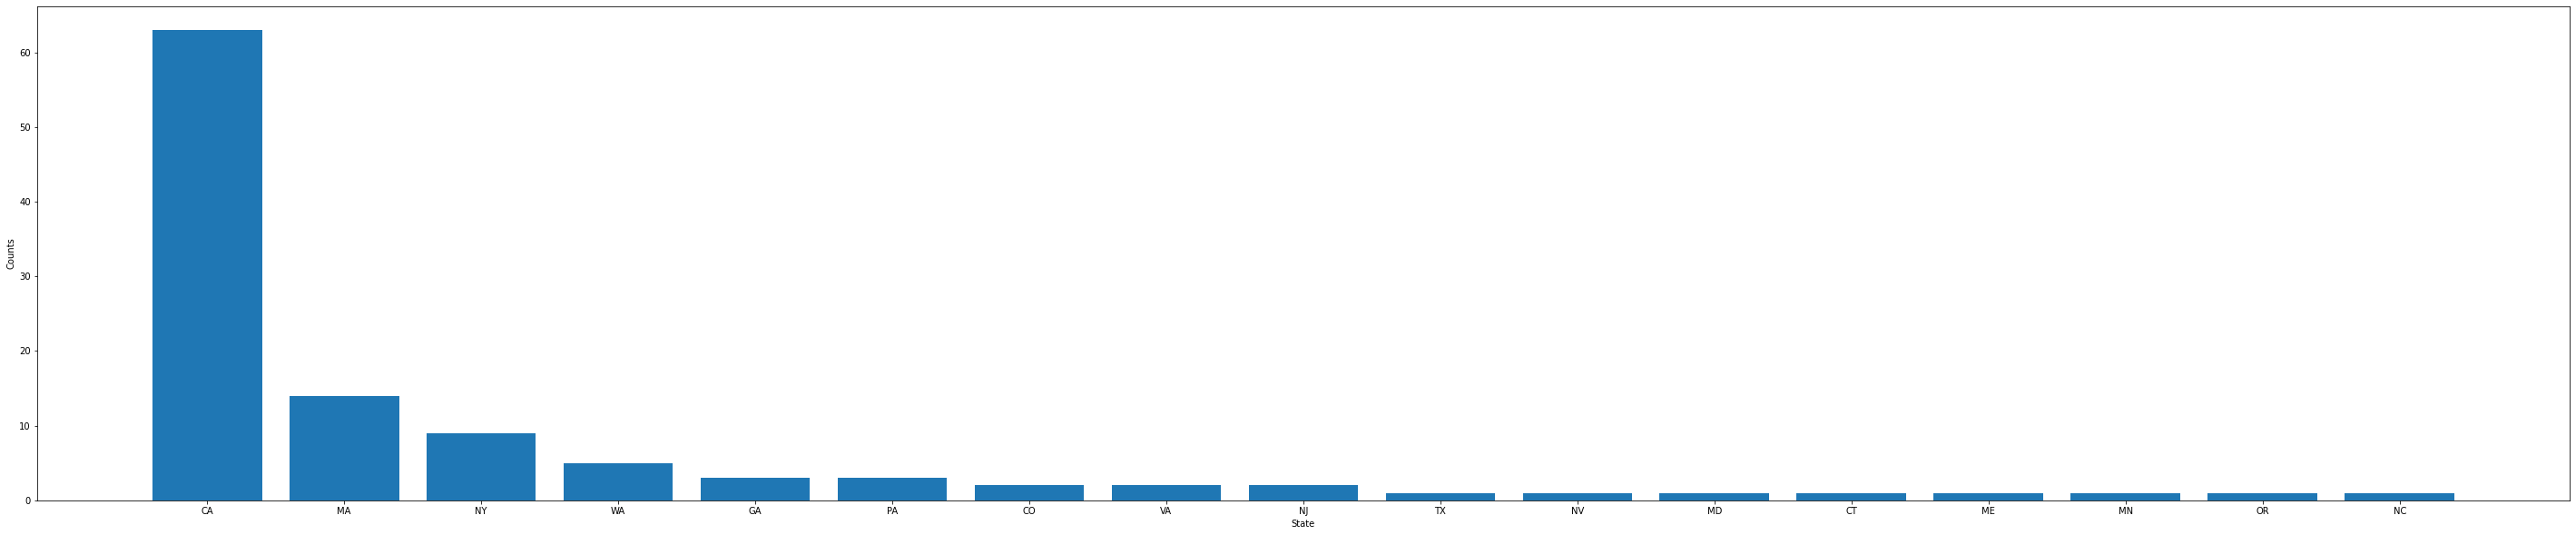

In [183]:
state = df_price_2['State'].value_counts()
fig, ax = plt.subplots(figsize=(50, 10))
plt.bar(state.index, state.values)
plt.xlabel("State")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

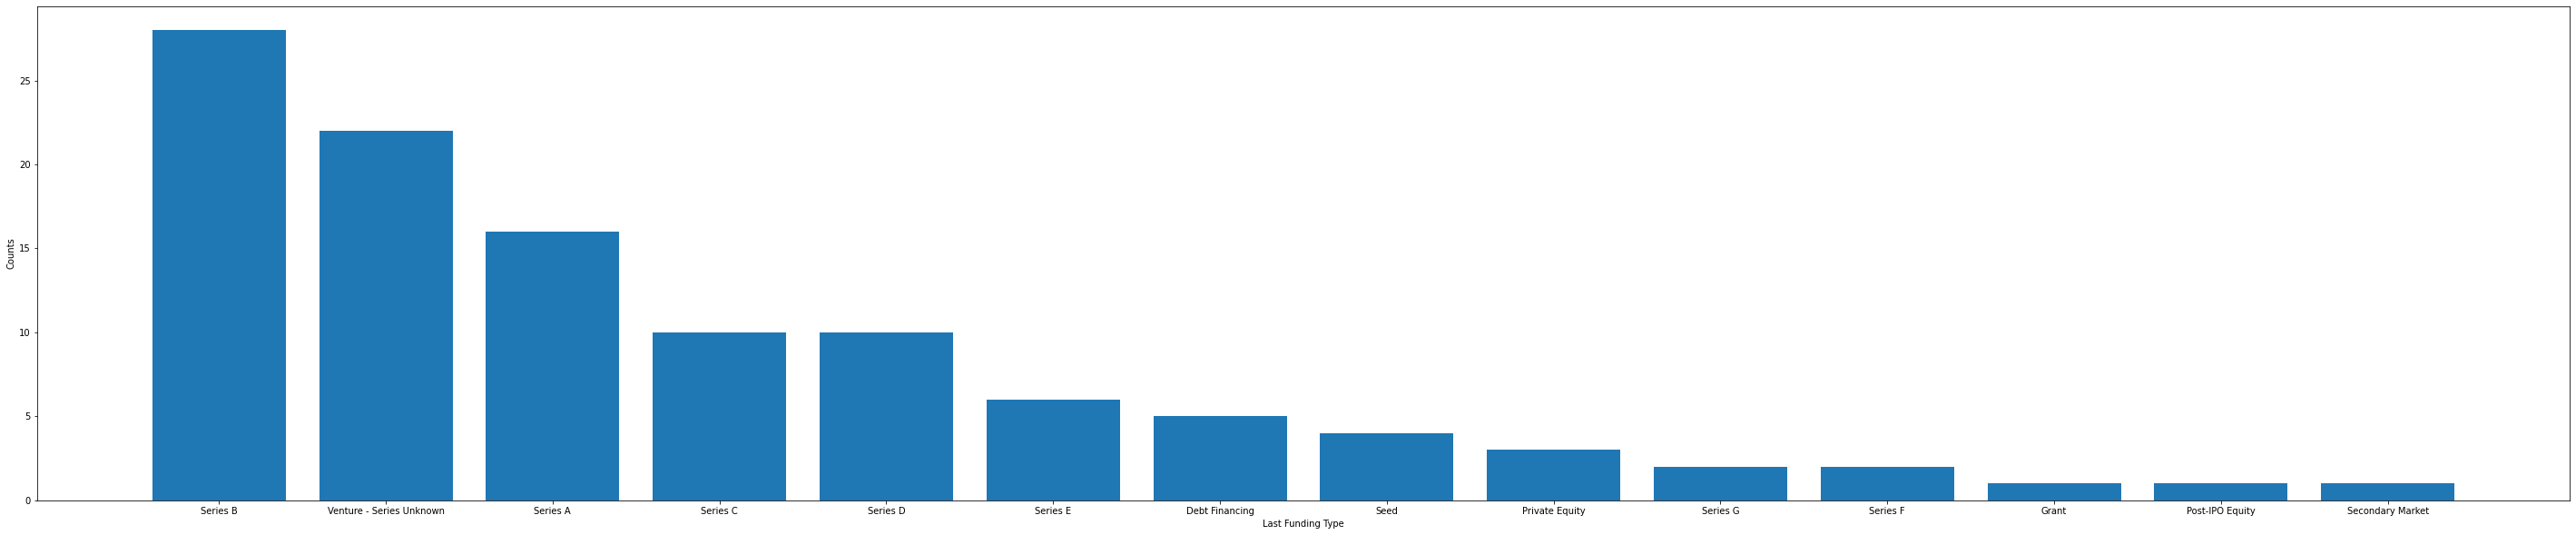

In [184]:
fund_type = df_price_2['Last Funding Type'].value_counts()
fig, ax = plt.subplots(figsize=(50, 10))
plt.bar(fund_type.index, fund_type.values)
plt.xlabel("Last Funding Type")
plt.ylabel("Counts")